# Appendix

教科書の理論の確認をpythonを用いたプログラムで確認する．

In [1]:
import filterpy.stats as fstats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import statistics as st
from scipy import stats
%matplotlib inline

plt.rcParams["font.size"] = 18

# 1.二次元正規分布

二次元正規分布をプロットする．

また，二次元正規分布を上から見たとき，確率分布がどのようになっているか表す．

さらに，二次元正規分布の等高線を描く．(標準偏差1つ，2つ，3つ分)

参考にしたサイト：
https://inzkyk.xyz/kalman_filter/
https://tips-memo.com/python-2d-gaussian

In [2]:
# 平均行列と分散共分散行列から，二次元正規分布を生成
def f(x, y, mu, Sigma):
  x_norm = (np.array([x, y]) - mu[:, None, None]).transpose(1, 2, 0)
  return np.exp(- x_norm[:, :, None, :] @ np.linalg.inv(Sigma)[None, None, :, :] @ x_norm[:, :, :, None] / 2.0) / (2*np.pi*np.sqrt(np.linalg.det(Sigma)))

## 無相関の場合

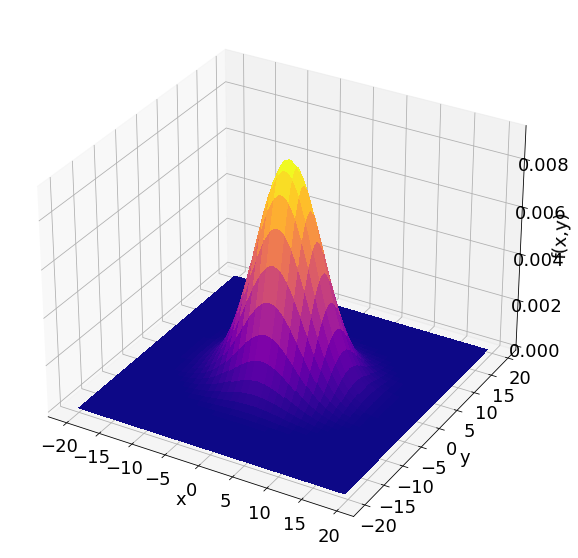

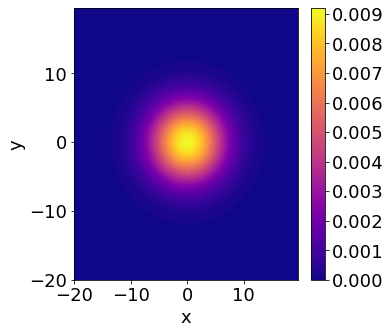

C:\Users\takahashi masaki\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\takahashi masaki\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0, flags=flags)


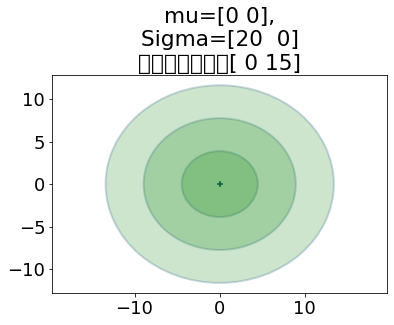

In [3]:
#--------平均ベクトルと分散共分散行列の指定--------------

mu = np.array([0, 0])
Sigma = np.array([[20, 0],[0, 15]])

#-------------------------------------------

x = y = np.arange(-20, 20, 0.5)
X, Y = np.meshgrid(x, y)



Z = f(X,Y, mu, Sigma)[:, :, 0, 0]

fig1 = plt.figure(figsize=(10,10))
ax1 = plt.subplot(111, projection='3d')
ax1.plot_surface(X,Y,Z, antialiased=False, cmap="plasma")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')

fig2 = plt.figure(figsize=(5,5))
ax2 = plt.subplot(111)
cs = ax2.contourf(X,Y,Z,100, cmap="plasma")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.colorbar(cs)

plt.show()

fstats.plot_covariance(mu, Sigma, fc='g', alpha=0.2, std=[1, 2, 3],
                        title=f'mu={mu},\nSigma={Sigma[0]}\n　　　　　　　{Sigma[1]}')
plt.gca().grid(b=False);

## 正の相関がある場合(相関係数:0.5)

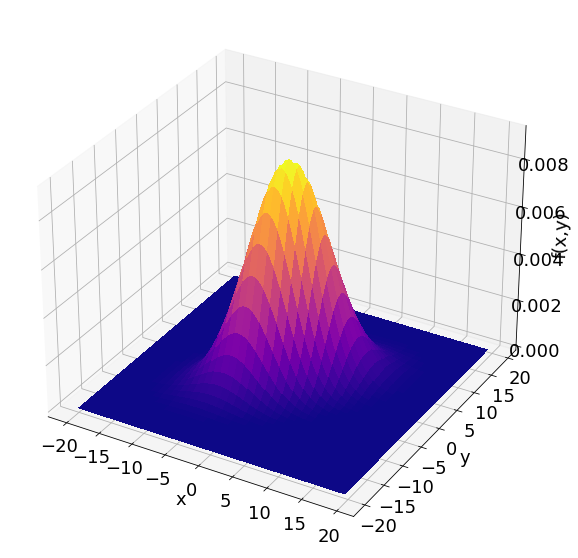

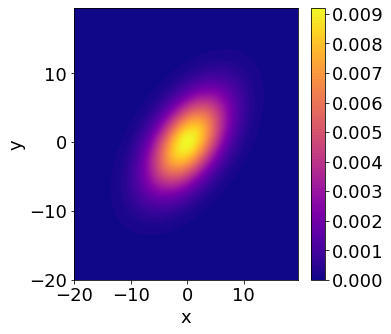

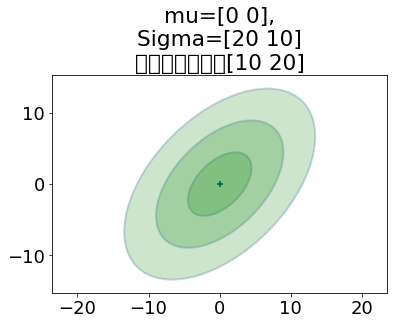

In [4]:
#--------平均ベクトルと分散共分散行列の指定--------------

mu = np.array([0, 0])
Sigma = np.array([[20, 10],[10, 20]])

#-------------------------------------------

x = y = np.arange(-20, 20, 0.5)
X, Y = np.meshgrid(x, y)



Z = f(X,Y, mu, Sigma)[:, :, 0, 0]

fig1 = plt.figure(figsize=(10,10))
ax1 = plt.subplot(111, projection='3d')
ax1.plot_surface(X,Y,Z, antialiased=False, cmap="plasma")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')

fig2 = plt.figure(figsize=(5,5))
ax2 = plt.subplot(111)
cs = ax2.contourf(X,Y,Z,100, cmap="plasma")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.colorbar(cs)

plt.show()

fstats.plot_covariance(mu, Sigma, fc='g', alpha=0.2, std=[1, 2, 3],
                        title=f'mu={mu},\nSigma={Sigma[0]}\n　　　　　　　{Sigma[1]}')
plt.gca().grid(b=False);

## 強い正の相関があるとき

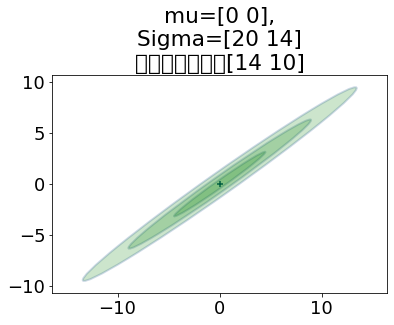

In [5]:
#--------平均ベクトルと分散共分散行列の指定--------------

mu = np.array([0, 0])
Sigma = np.array([[20, 14],[14, 10]])
#Sigma = np.array([[20, 20],[20, 20]])
#-------------------------------------------

fstats.plot_covariance(mu, Sigma, fc='g', alpha=0.2, std=[1, 2, 3],
                        title=f'mu={mu},\nSigma={Sigma[0]}\n　　　　　　　{Sigma[1]}')
plt.gca().grid(b=False);

# 負の相関があるとき

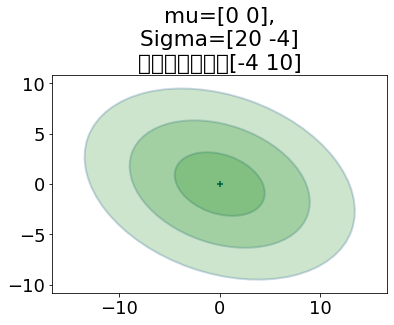

In [6]:
#--------平均ベクトルと分散共分散行列の指定--------------

mu = np.array([0, 0])
Sigma = np.array([[20, -4],[-4, 10]])

#-------------------------------------------

fstats.plot_covariance(mu, Sigma, fc='g', alpha=0.2, std=[1, 2, 3],
                        title=f'mu={mu},\nSigma={Sigma[0]}\n　　　　　　　{Sigma[1]}')
plt.gca().grid(b=False);

## 平均が(0,0)でないとき

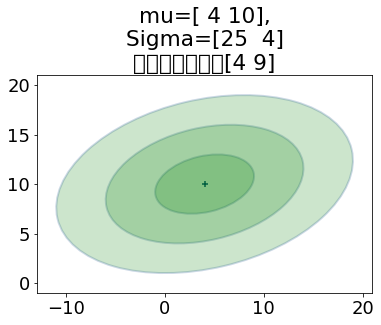

In [7]:
#--------平均ベクトルと分散共分散行列の指定--------------

mu = np.array([4, 10])
Sigma = np.array([[25, 4],[4, 9]])

#-------------------------------------------

fstats.plot_covariance(mu, Sigma, fc='g', alpha=0.2, std=[1, 2, 3],
                        title=f'mu={mu},\nSigma={Sigma[0]}\n　　　　　　　{Sigma[1]}')
plt.gca().grid(b=False);

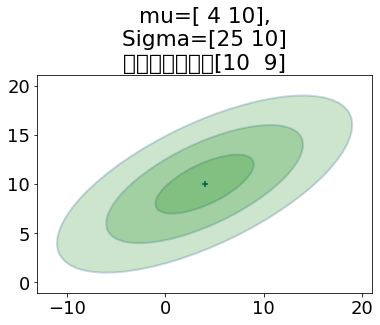

In [8]:
#--------平均ベクトルと分散共分散行列の指定--------------

mu = np.array([4, 10])
Sigma = np.array([[25, 10],[10, 9]])

#-------------------------------------------

fstats.plot_covariance(mu, Sigma, fc='g', alpha=0.2, std=[1, 2, 3],
                        title=f'mu={mu},\nSigma={Sigma[0]}\n　　　　　　　{Sigma[1]}')
plt.gca().grid(b=False);

# 2.再生性

再生性の確認．X(青)とY(オレンジ)は各確率分布に従う乱数．S(緑)はそれらの和．T(赤)は再生性が成り立つときにX+Yが従うはずの確率分布に従う乱数．

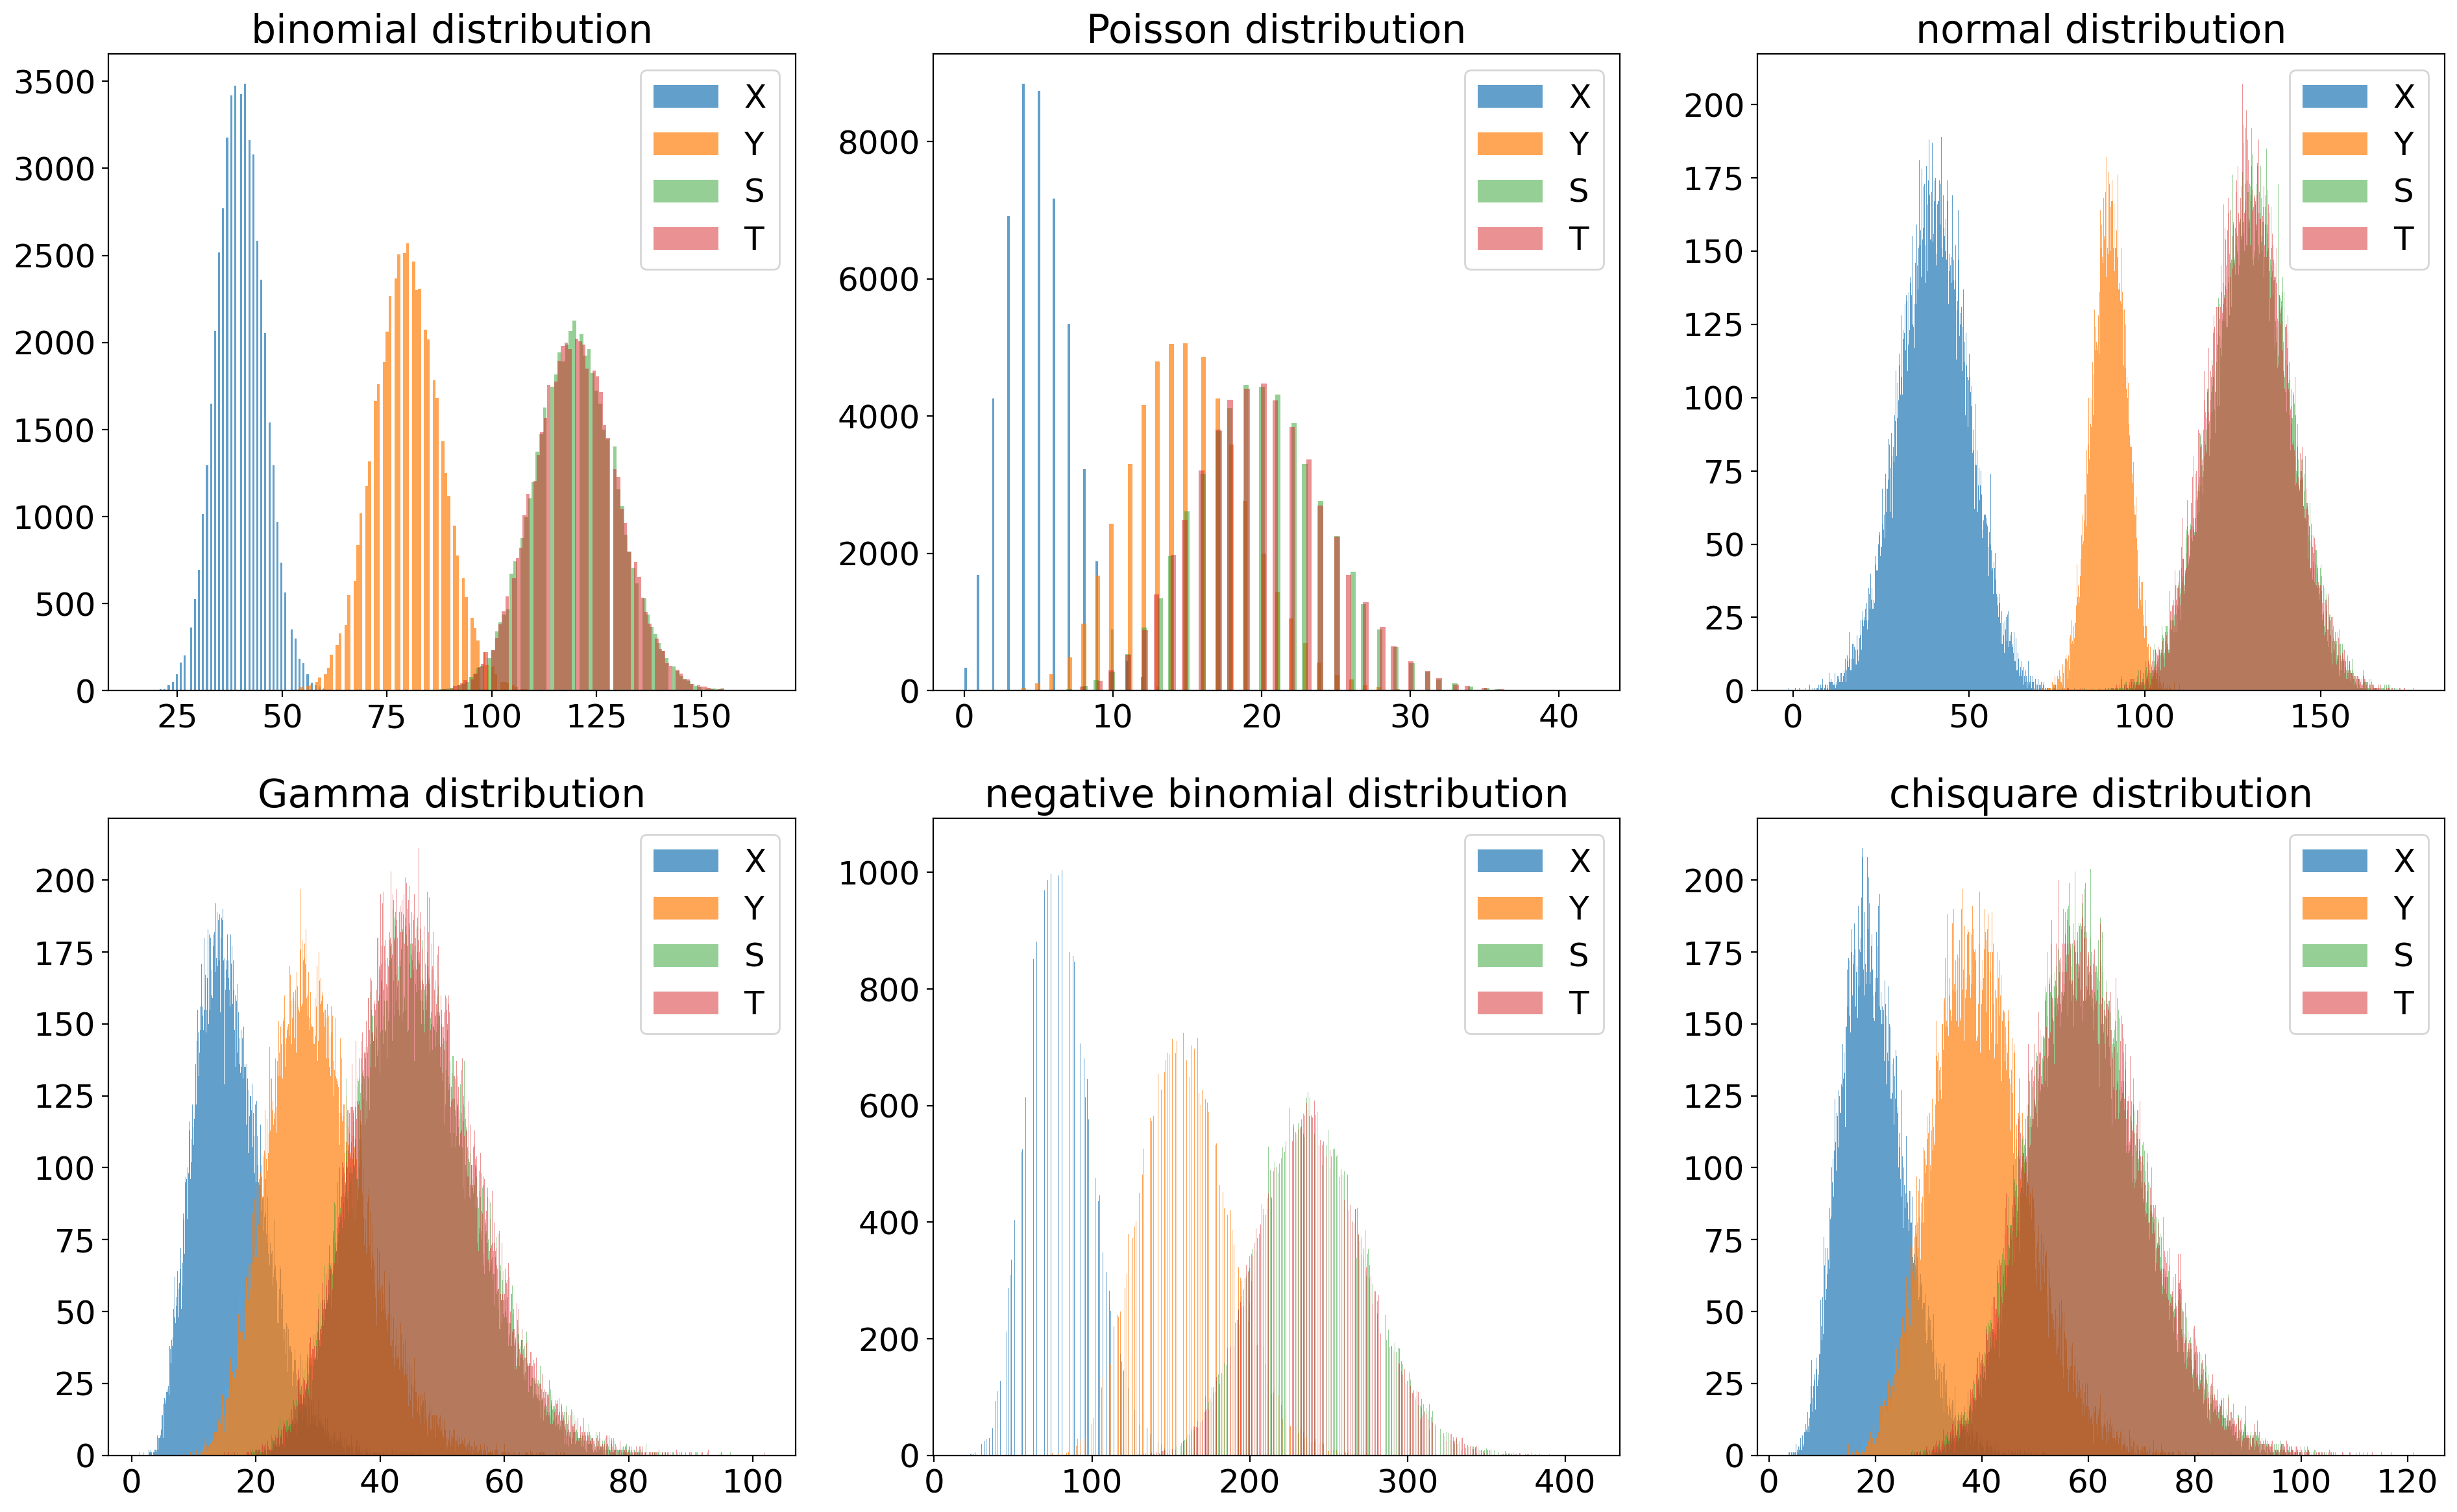

In [9]:
fig = plt.figure(figsize = (20, 12), dpi = 200)

#-----------------二項分布------------------------------------------------#

ax = fig.add_subplot(2, 3, 1)
plt.title('binomial distribution')

#--parameter--
n = 200
m = 400
p = 0.2
#------------

X = np.random.binomial(n, p, 50000)
Y = np.random.binomial(m, p, 50000)
S = X + Y
T = np.random.binomial(n + m, p, 50000)

plt.hist(X, bins = 100, label = 'X', alpha = 0.7)
plt.hist(Y, bins = 100, label = 'Y', alpha = 0.7)
plt.hist(S, bins = 100, label = 'S', alpha = 0.5)
plt.hist(T, bins = 100, label = 'T', alpha = 0.5)

plt.legend()


#-----------------ポアソン分布------------------------------------------------#

ax = fig.add_subplot(2, 3, 2)
plt.title('Poisson distribution')

#--parameter--
lam = 5
mu = 15
#-------------

X = np.random.poisson(lam, 50000)
Y = np.random.poisson(mu, 50000)
S = X + Y
T = np.random.poisson(lam + mu, 50000)

plt.hist(X, bins = 100, label = 'X', alpha = 0.7)
plt.hist(Y, bins = 100, label = 'Y', alpha = 0.7)
plt.hist(S, bins = 100, label = 'S', alpha = 0.5)
plt.hist(T, bins = 100, label = 'T', alpha = 0.5)

plt.legend()

#-----------------正規分布------------------------------------------------#

ax = fig.add_subplot(2, 3, 3)
plt.title('normal distribution')

#--parameter--
mu_X = 40
sigma_X = 10
mu_Y = 90
sigma_Y = 5
#------------

X = np.random.normal(mu_X, sigma_X, 50000)
Y = np.random.normal(mu_Y, sigma_Y, 50000)
S = X + Y
T = np.random.normal(mu_X + mu_Y, np.sqrt(sigma_X ** 2 + sigma_Y ** 2), 50000)

plt.hist(X, bins = 1000, label = 'X', alpha = 0.7)
plt.hist(Y, bins = 1000, label = 'Y', alpha = 0.7)
plt.hist(S, bins = 1000, label = 'S', alpha = 0.5)
plt.hist(T, bins = 1000, label = 'T', alpha = 0.5)

plt.legend()

#-----------------ガンマ分布(alpha=1のときは指数分布)------------------------------------------------#
ax = fig.add_subplot(2, 3, 4)
plt.title('Gamma distribution')

#--parameter--
alpha_1 = 8
alpha_2 = 15
scale = 2
#-------------

X = np.random.gamma(alpha_1, scale, 50000)
Y = np.random.gamma(alpha_2, scale, 50000)
S = X + Y
T = np.random.gamma(alpha_1 + alpha_2, scale, 50000)

plt.hist(X, bins = 1000, label = 'X', alpha = 0.7)
plt.hist(Y, bins = 1000, label = 'Y', alpha = 0.7)
plt.hist(S, bins = 1000, label = 'S', alpha = 0.5)
plt.hist(T, bins = 1000, label = 'T', alpha = 0.5)

plt.legend()

#-----------------負の二項分布(k=1のとき幾何分布)------------------------------------------------#
ax = fig.add_subplot(2, 3, 5)
plt.title('negative binomial distribution')

#--parameter--
k_1 = 20
k_2 = 40
p = 0.2
#-------------

X = np.random.negative_binomial(k_1, p, 50000)
Y = np.random.negative_binomial(k_2, p, 50000)
S = X + Y
T = np.random.negative_binomial(k_1 + k_2, p, 50000)

plt.hist(X, bins = 1000, label = 'X', alpha = 0.7)
plt.hist(Y, bins = 1000, label = 'Y', alpha = 0.7)
plt.hist(S, bins = 1000, label = 'S', alpha = 0.5)
plt.hist(T, bins = 1000, label = 'T', alpha = 0.5)

plt.legend()

#-----------------カイ二乗分布------------------------------------------------#
ax = fig.add_subplot(2, 3, 6)
plt.title('chisquare distribution')

#--parameter--
k_1 = 20
k_2 = 40
#-------------

X = np.random.chisquare(k_1, 50000)
Y = np.random.chisquare(k_2, 50000)
S = X + Y
T = np.random.chisquare(k_1 + k_2, 50000)

plt.hist(X, bins = 1000, label = 'X', alpha = 0.7)
plt.hist(Y, bins = 1000, label = 'Y', alpha = 0.7)
plt.hist(S, bins = 1000, label = 'S', alpha = 0.5)
plt.hist(T, bins = 1000, label = 'T', alpha = 0.5)

plt.legend()

plt.subplots_adjust(left = 0.05, right=0.95, bottom = 0.05, top = 0.95)
plt.show()

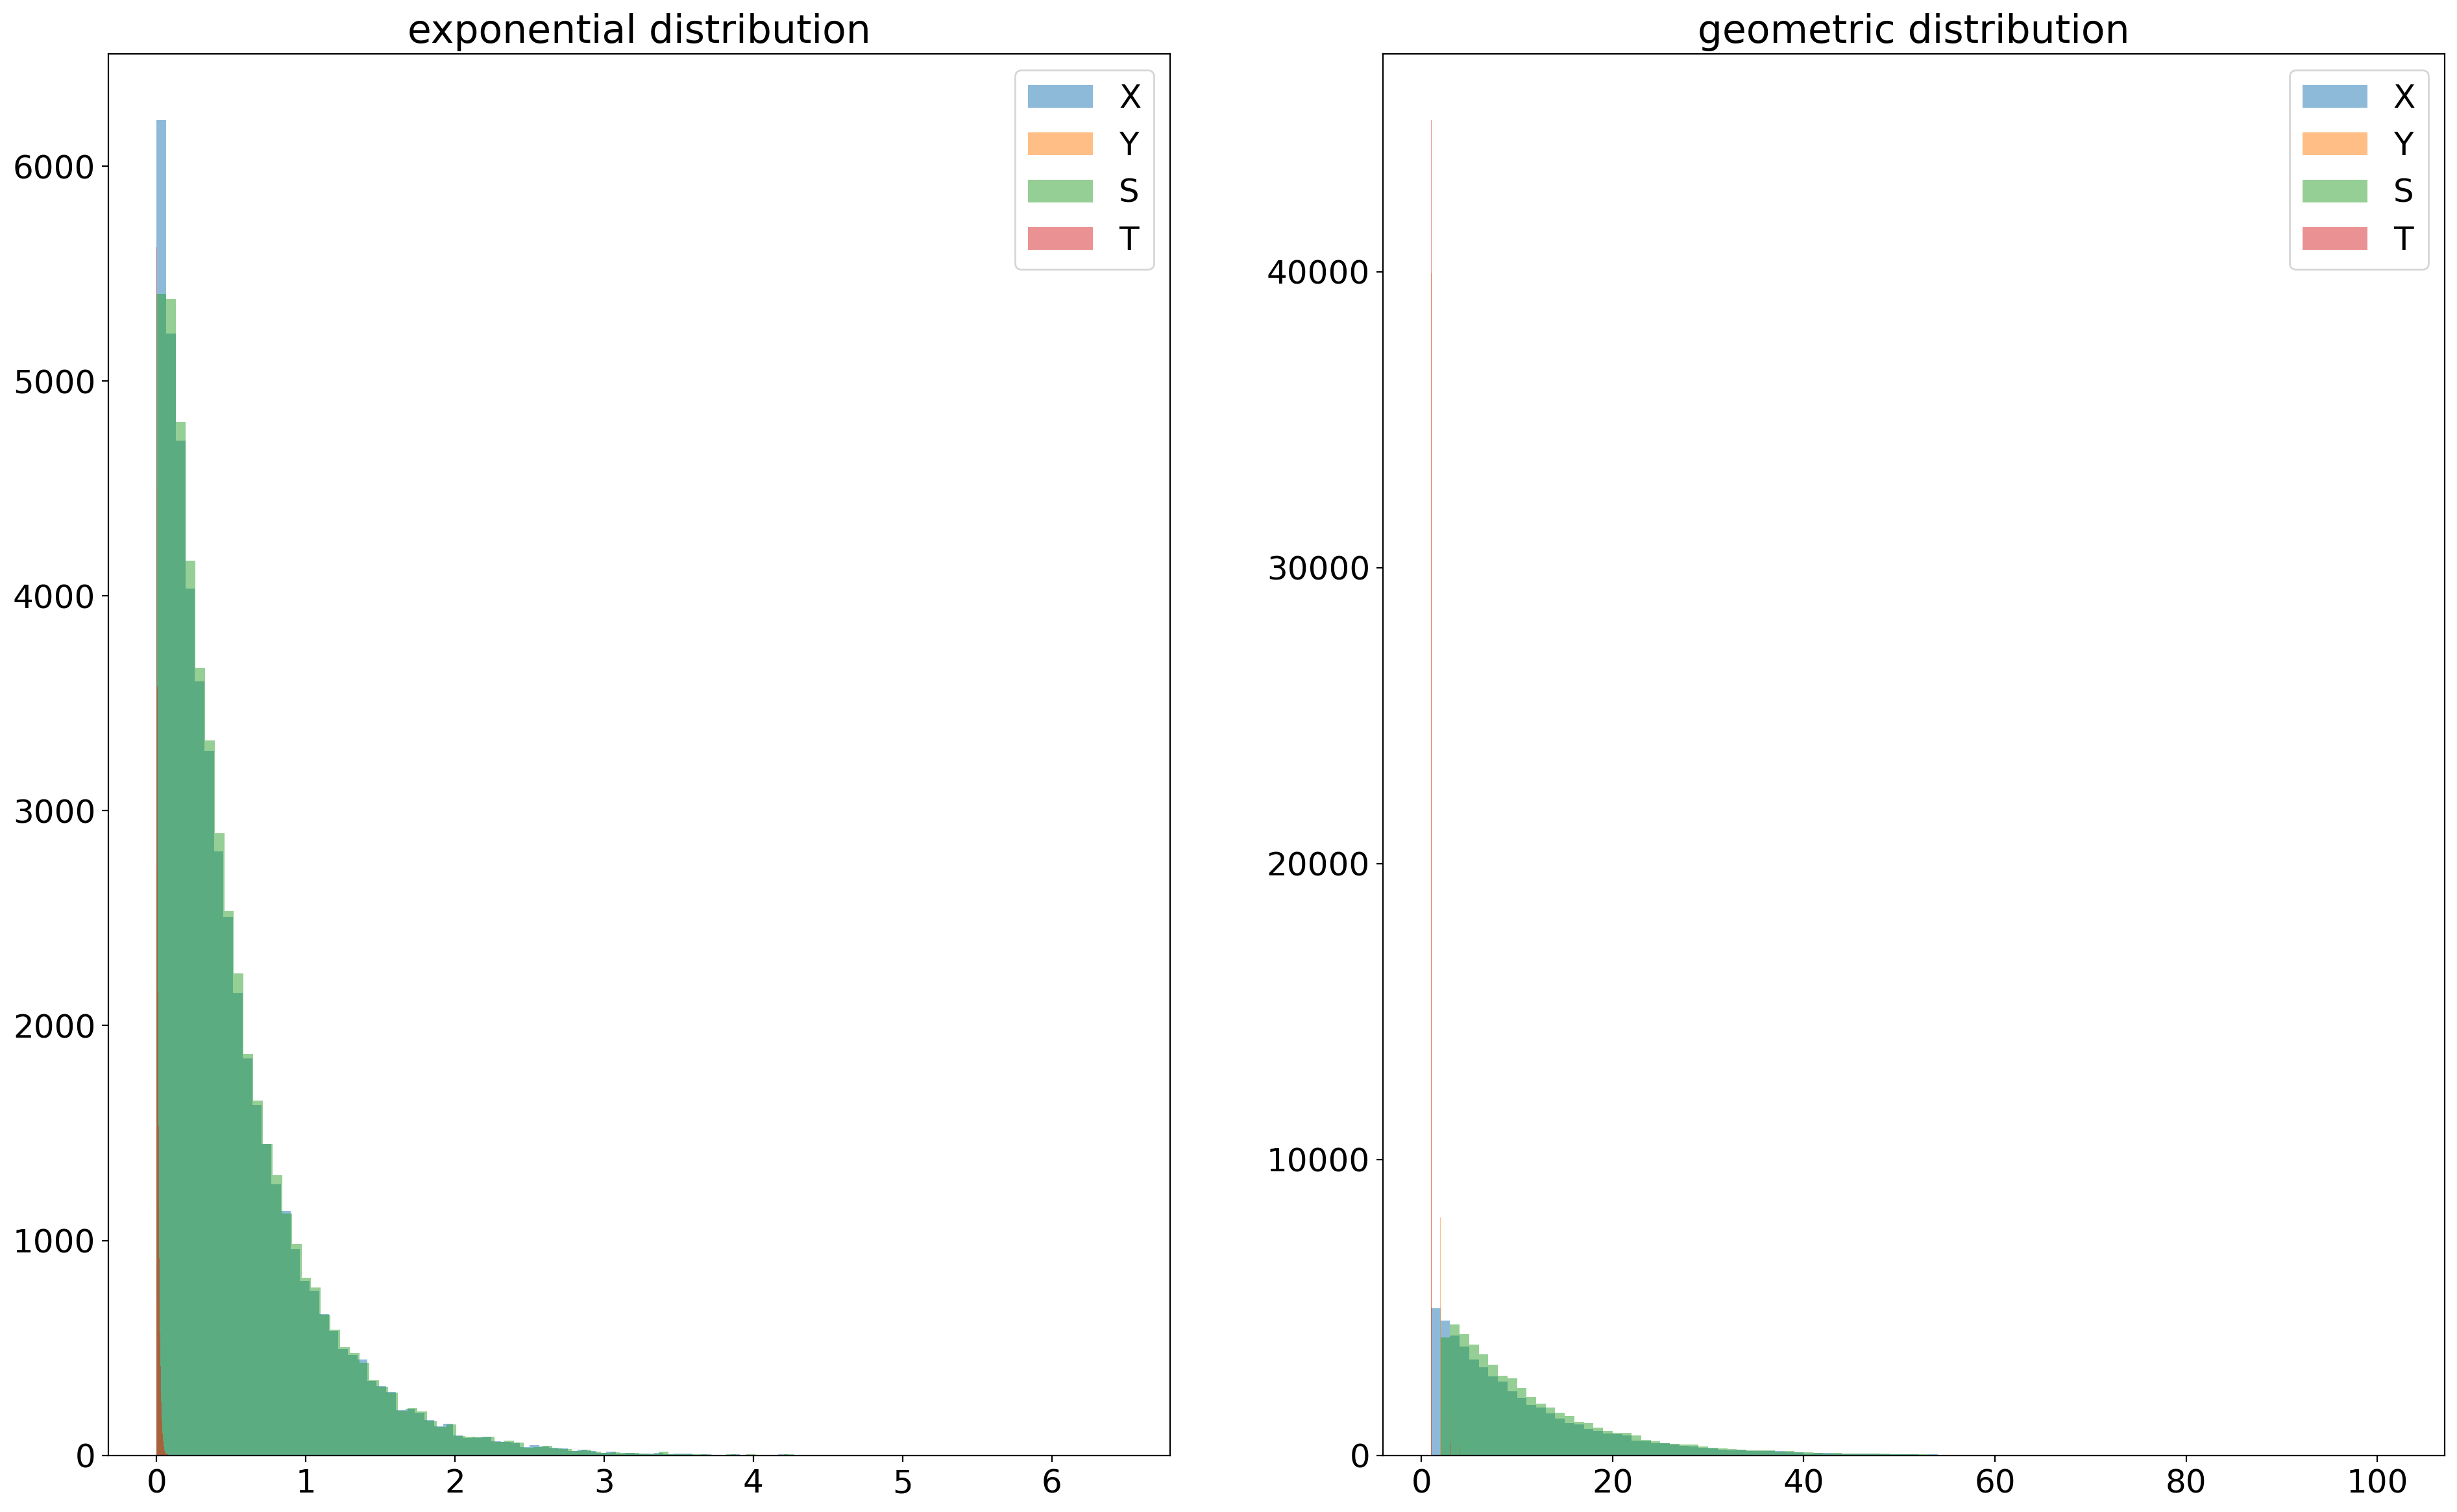

In [10]:
fig = plt.figure(figsize = (20, 12), dpi = 200)

#-----------------指数分布------------------------------------------------#

ax = fig.add_subplot(1, 2, 1)
plt.title('exponential distribution')

#--parameter--
lam_1 = 2
lam_2 = 100
#------------

X = np.random.exponential(1/lam_1, 50000)
Y = np.random.exponential(1/lam_2, 50000)
S = X + Y
T = np.random.exponential(1/(lam_1 + lam_2), 50000)

plt.hist(X, bins = 100, label = 'X', alpha = 0.5)
plt.hist(Y, bins = 100, label = 'Y', alpha = 0.5)
plt.hist(S, bins = 100, label = 'S', alpha = 0.5)
plt.hist(T, bins = 100, label = 'T', alpha = 0.5)

plt.legend()

#-----------------幾何分布------------------------------------------------#
ax = fig.add_subplot(1, 2, 2)
plt.title('geometric distribution')

#--parameter--
p_1 = 0.1
p_2 = 0.8
#-------------

X = np.random.geometric(p_1, 50000)
Y = np.random.geometric(p_2, 50000)
S = X + Y
T = np.random.geometric(p_1 + p_2, 50000)

plt.hist(X, bins = 100, label = 'X', alpha = 0.5)
plt.hist(Y, bins = 100, label = 'Y', alpha = 0.5)
plt.hist(S, bins = 100, label = 'S', alpha = 0.5)
plt.hist(T, bins = 100, label = 'T', alpha = 0.5)

plt.legend()

plt.subplots_adjust(left = 0.05, right=0.95, bottom = 0.05, top = 0.95)
plt.show()

## 二項分布

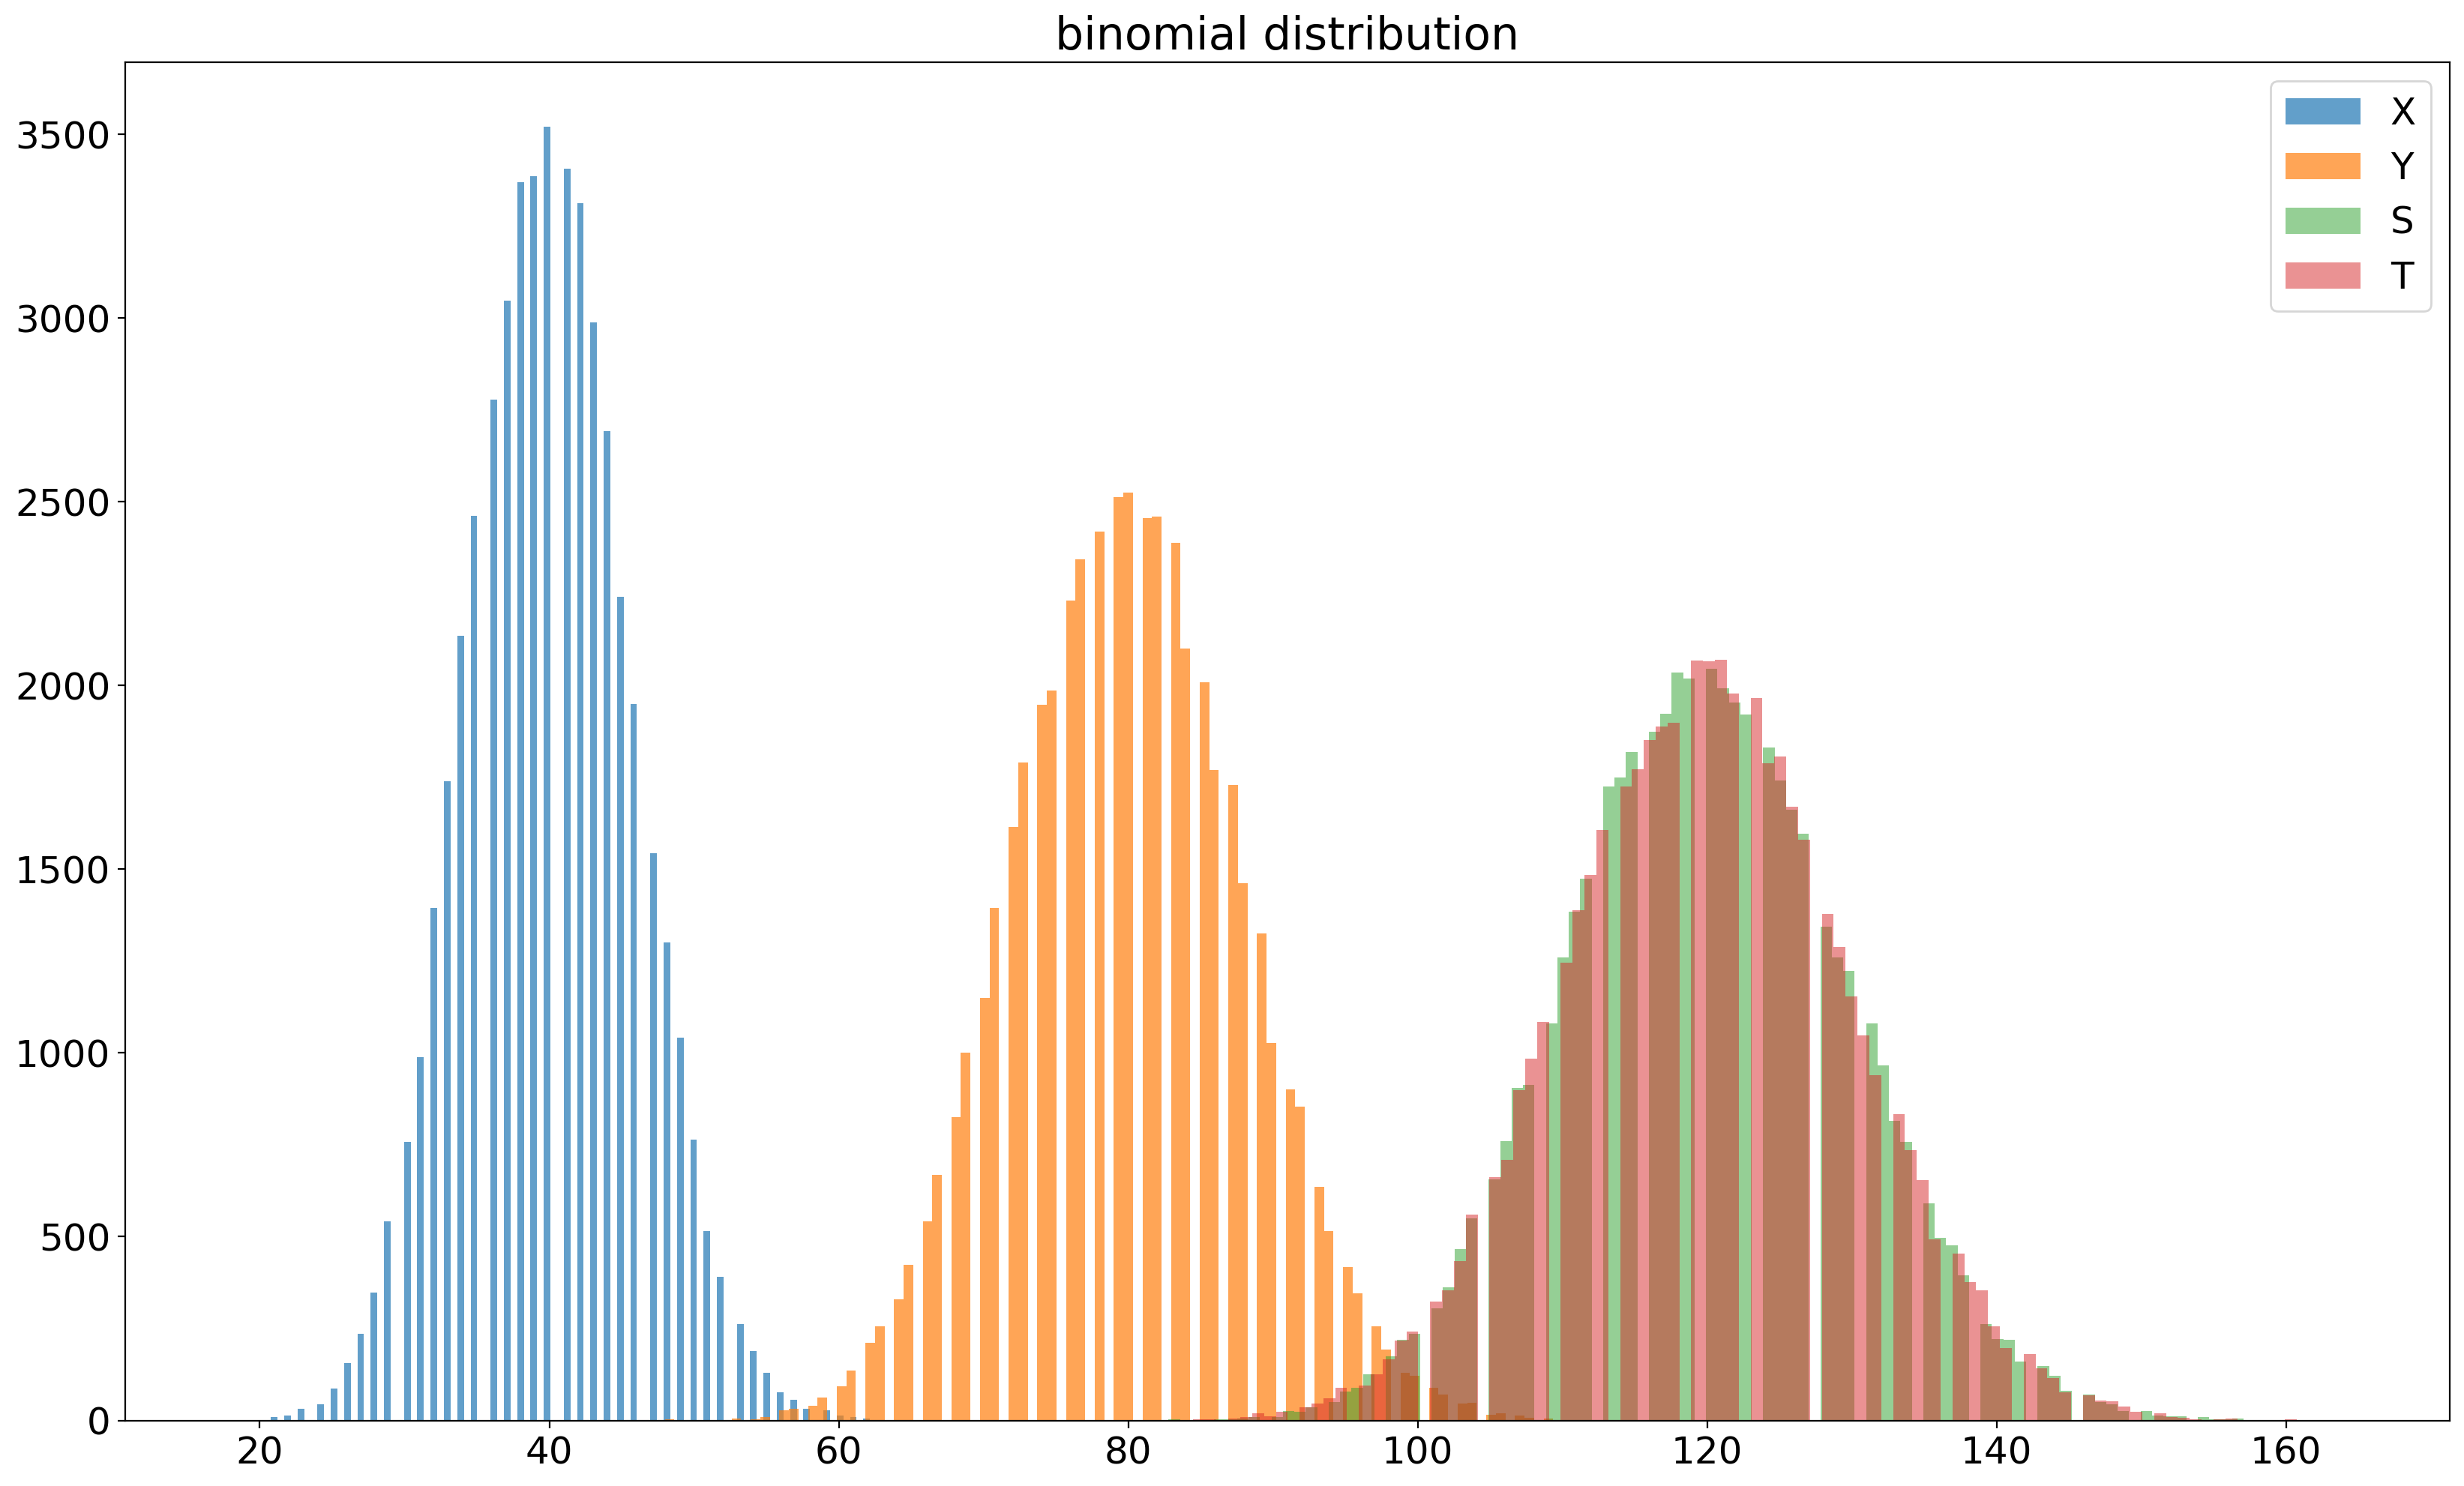

In [11]:
fig = plt.figure(figsize = (20, 12), dpi = 200)


plt.title('binomial distribution')

#--parameter--
n = 200
m = 400
p = 0.2
#-------------

X = np.random.binomial(n, p, 50000)
Y = np.random.binomial(m, p, 50000)
S = X + Y
T = np.random.binomial(n + m, p, 50000)

plt.hist(X, bins = 100, label = 'X', alpha = 0.7)
plt.hist(Y, bins = 100, label = 'Y', alpha = 0.7)
plt.hist(S, bins = 100, label = 'S', alpha = 0.5)
plt.hist(T, bins = 100, label = 'T', alpha = 0.5)

plt.legend()
plt.show()

## ポアソン分布

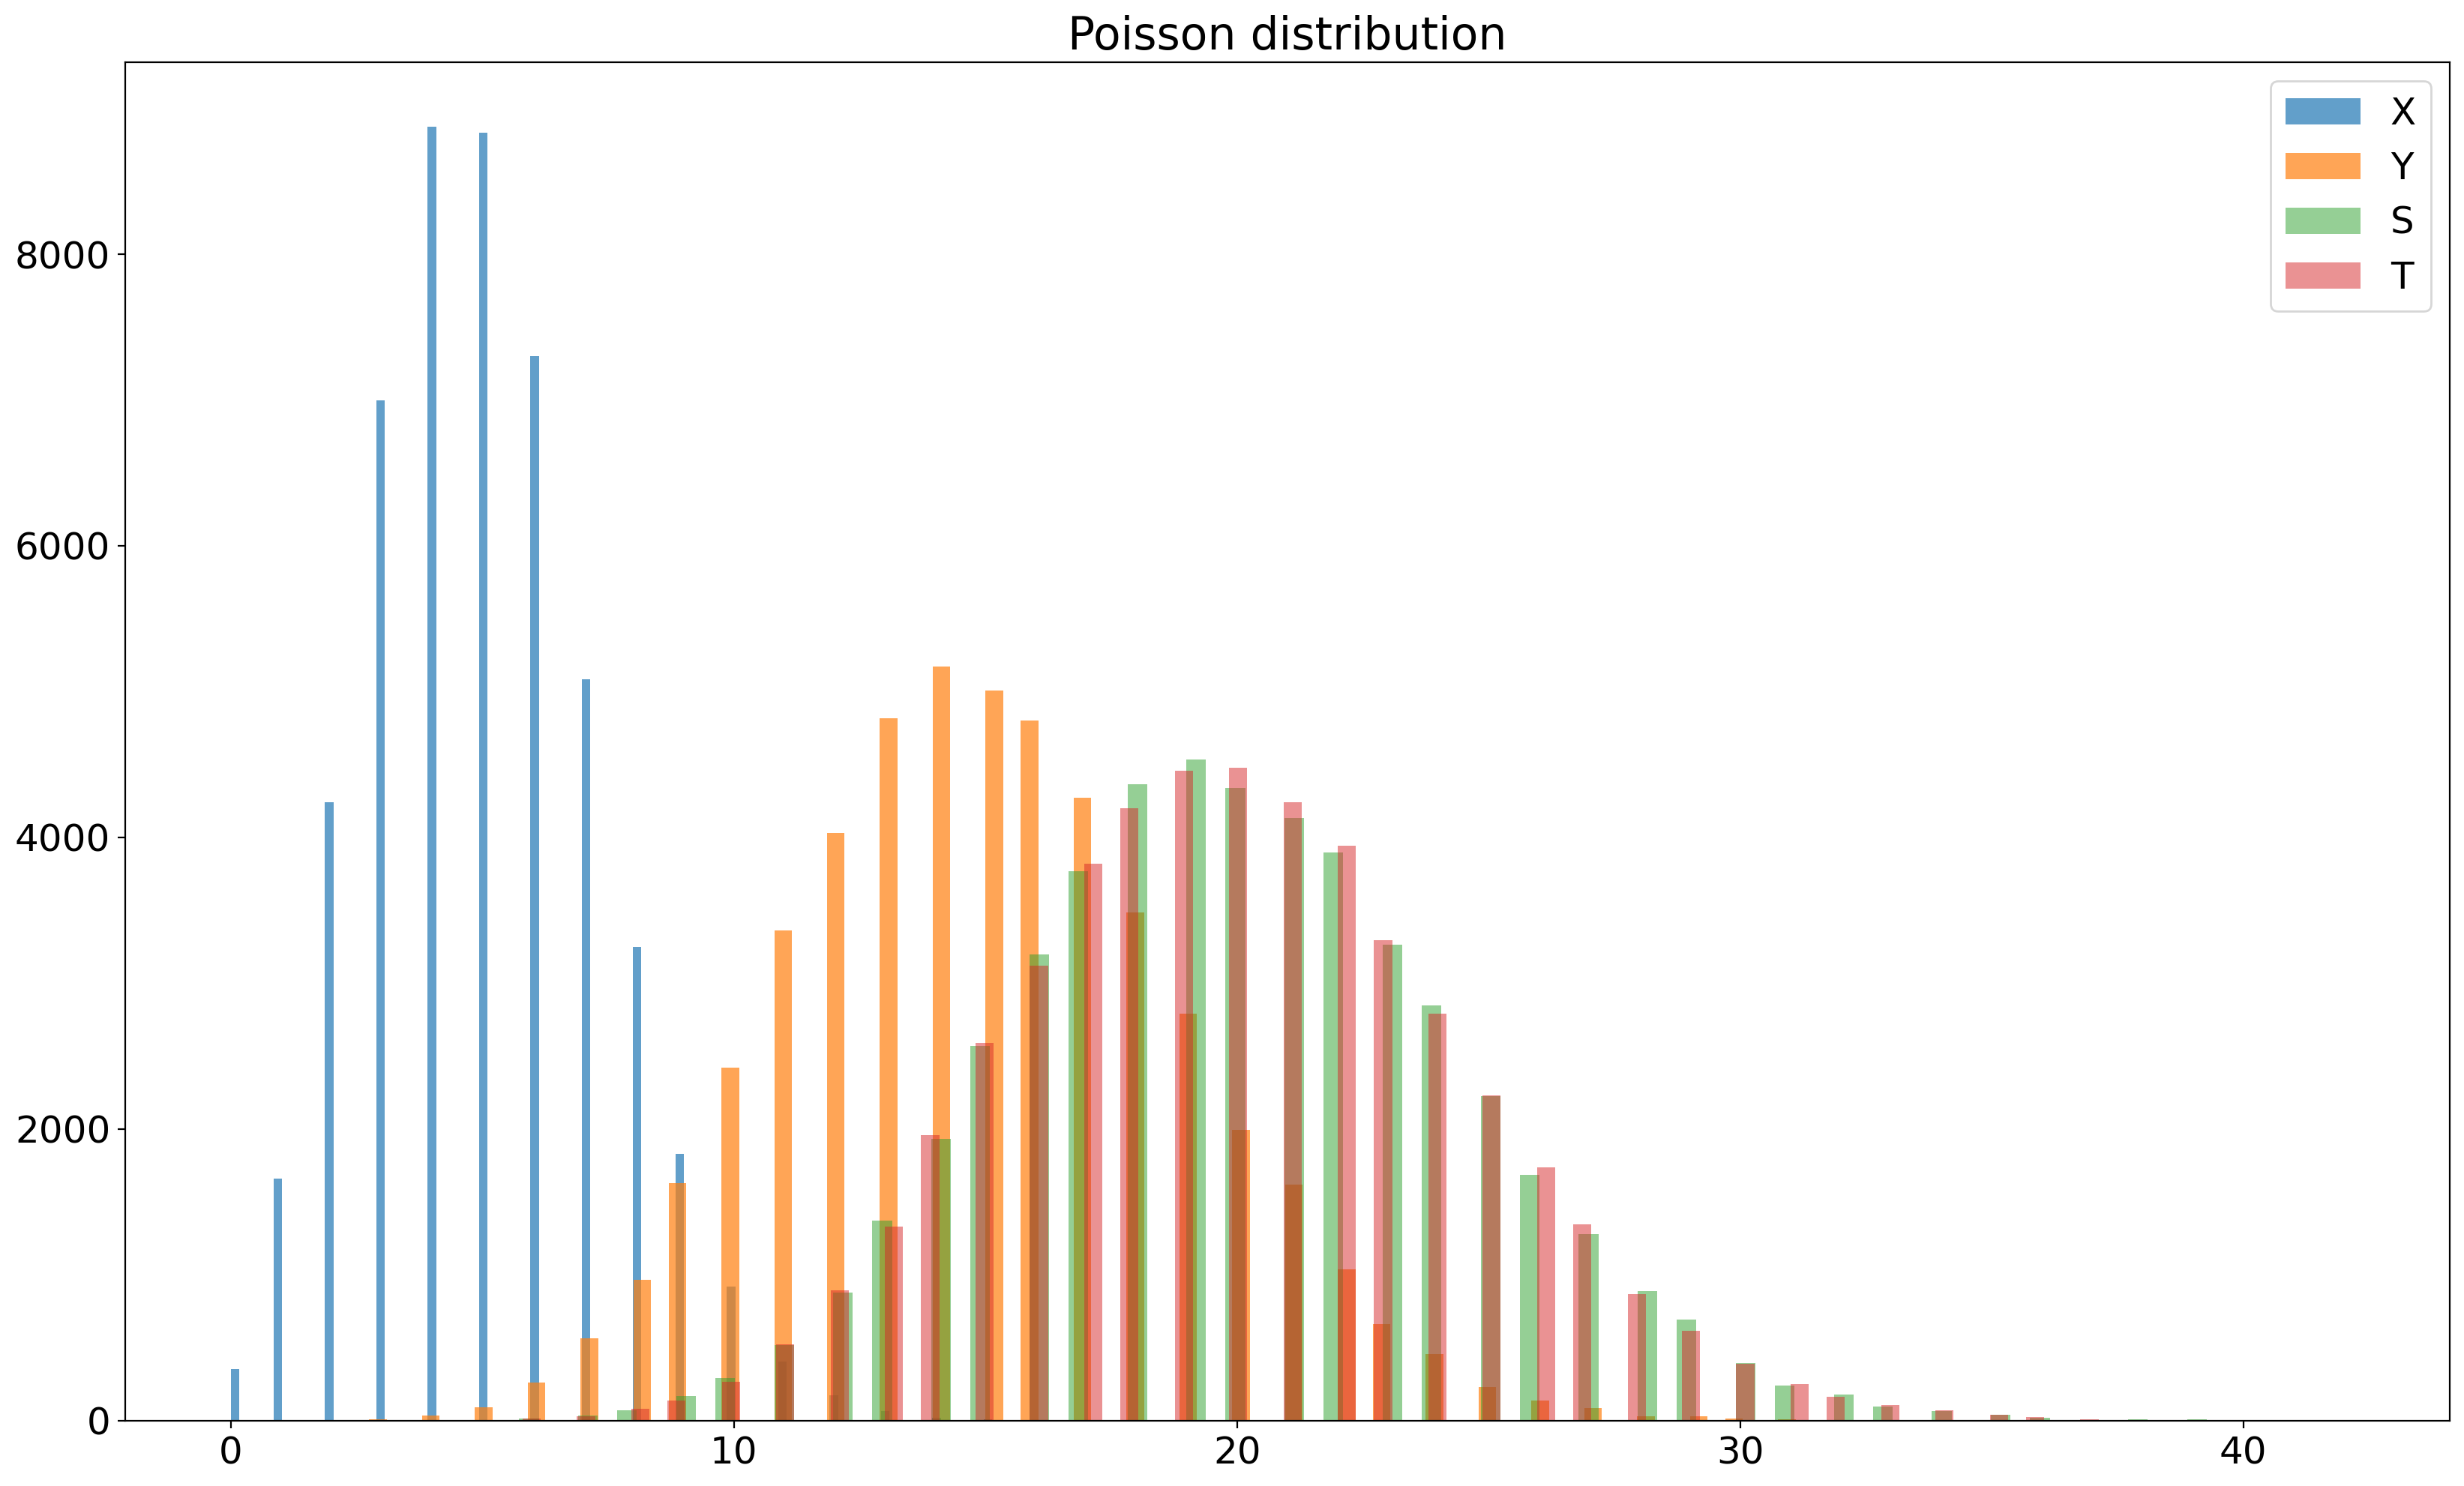

In [12]:
fig = plt.figure(figsize = (20, 12), dpi = 200)

plt.title('Poisson distribution')

#--parameter--
lam = 5
mu = 15
#-------------

X = np.random.poisson(lam, 50000)
Y = np.random.poisson(mu, 50000)
S = X + Y
T = np.random.poisson(lam + mu, 50000)

plt.hist(X, bins = 100, label = 'X', alpha = 0.7)
plt.hist(Y, bins = 100, label = 'Y', alpha = 0.7)
plt.hist(S, bins = 100, label = 'S', alpha = 0.5)
plt.hist(T, bins = 100, label = 'T', alpha = 0.5)

plt.legend()
plt.show()

## 正規分布

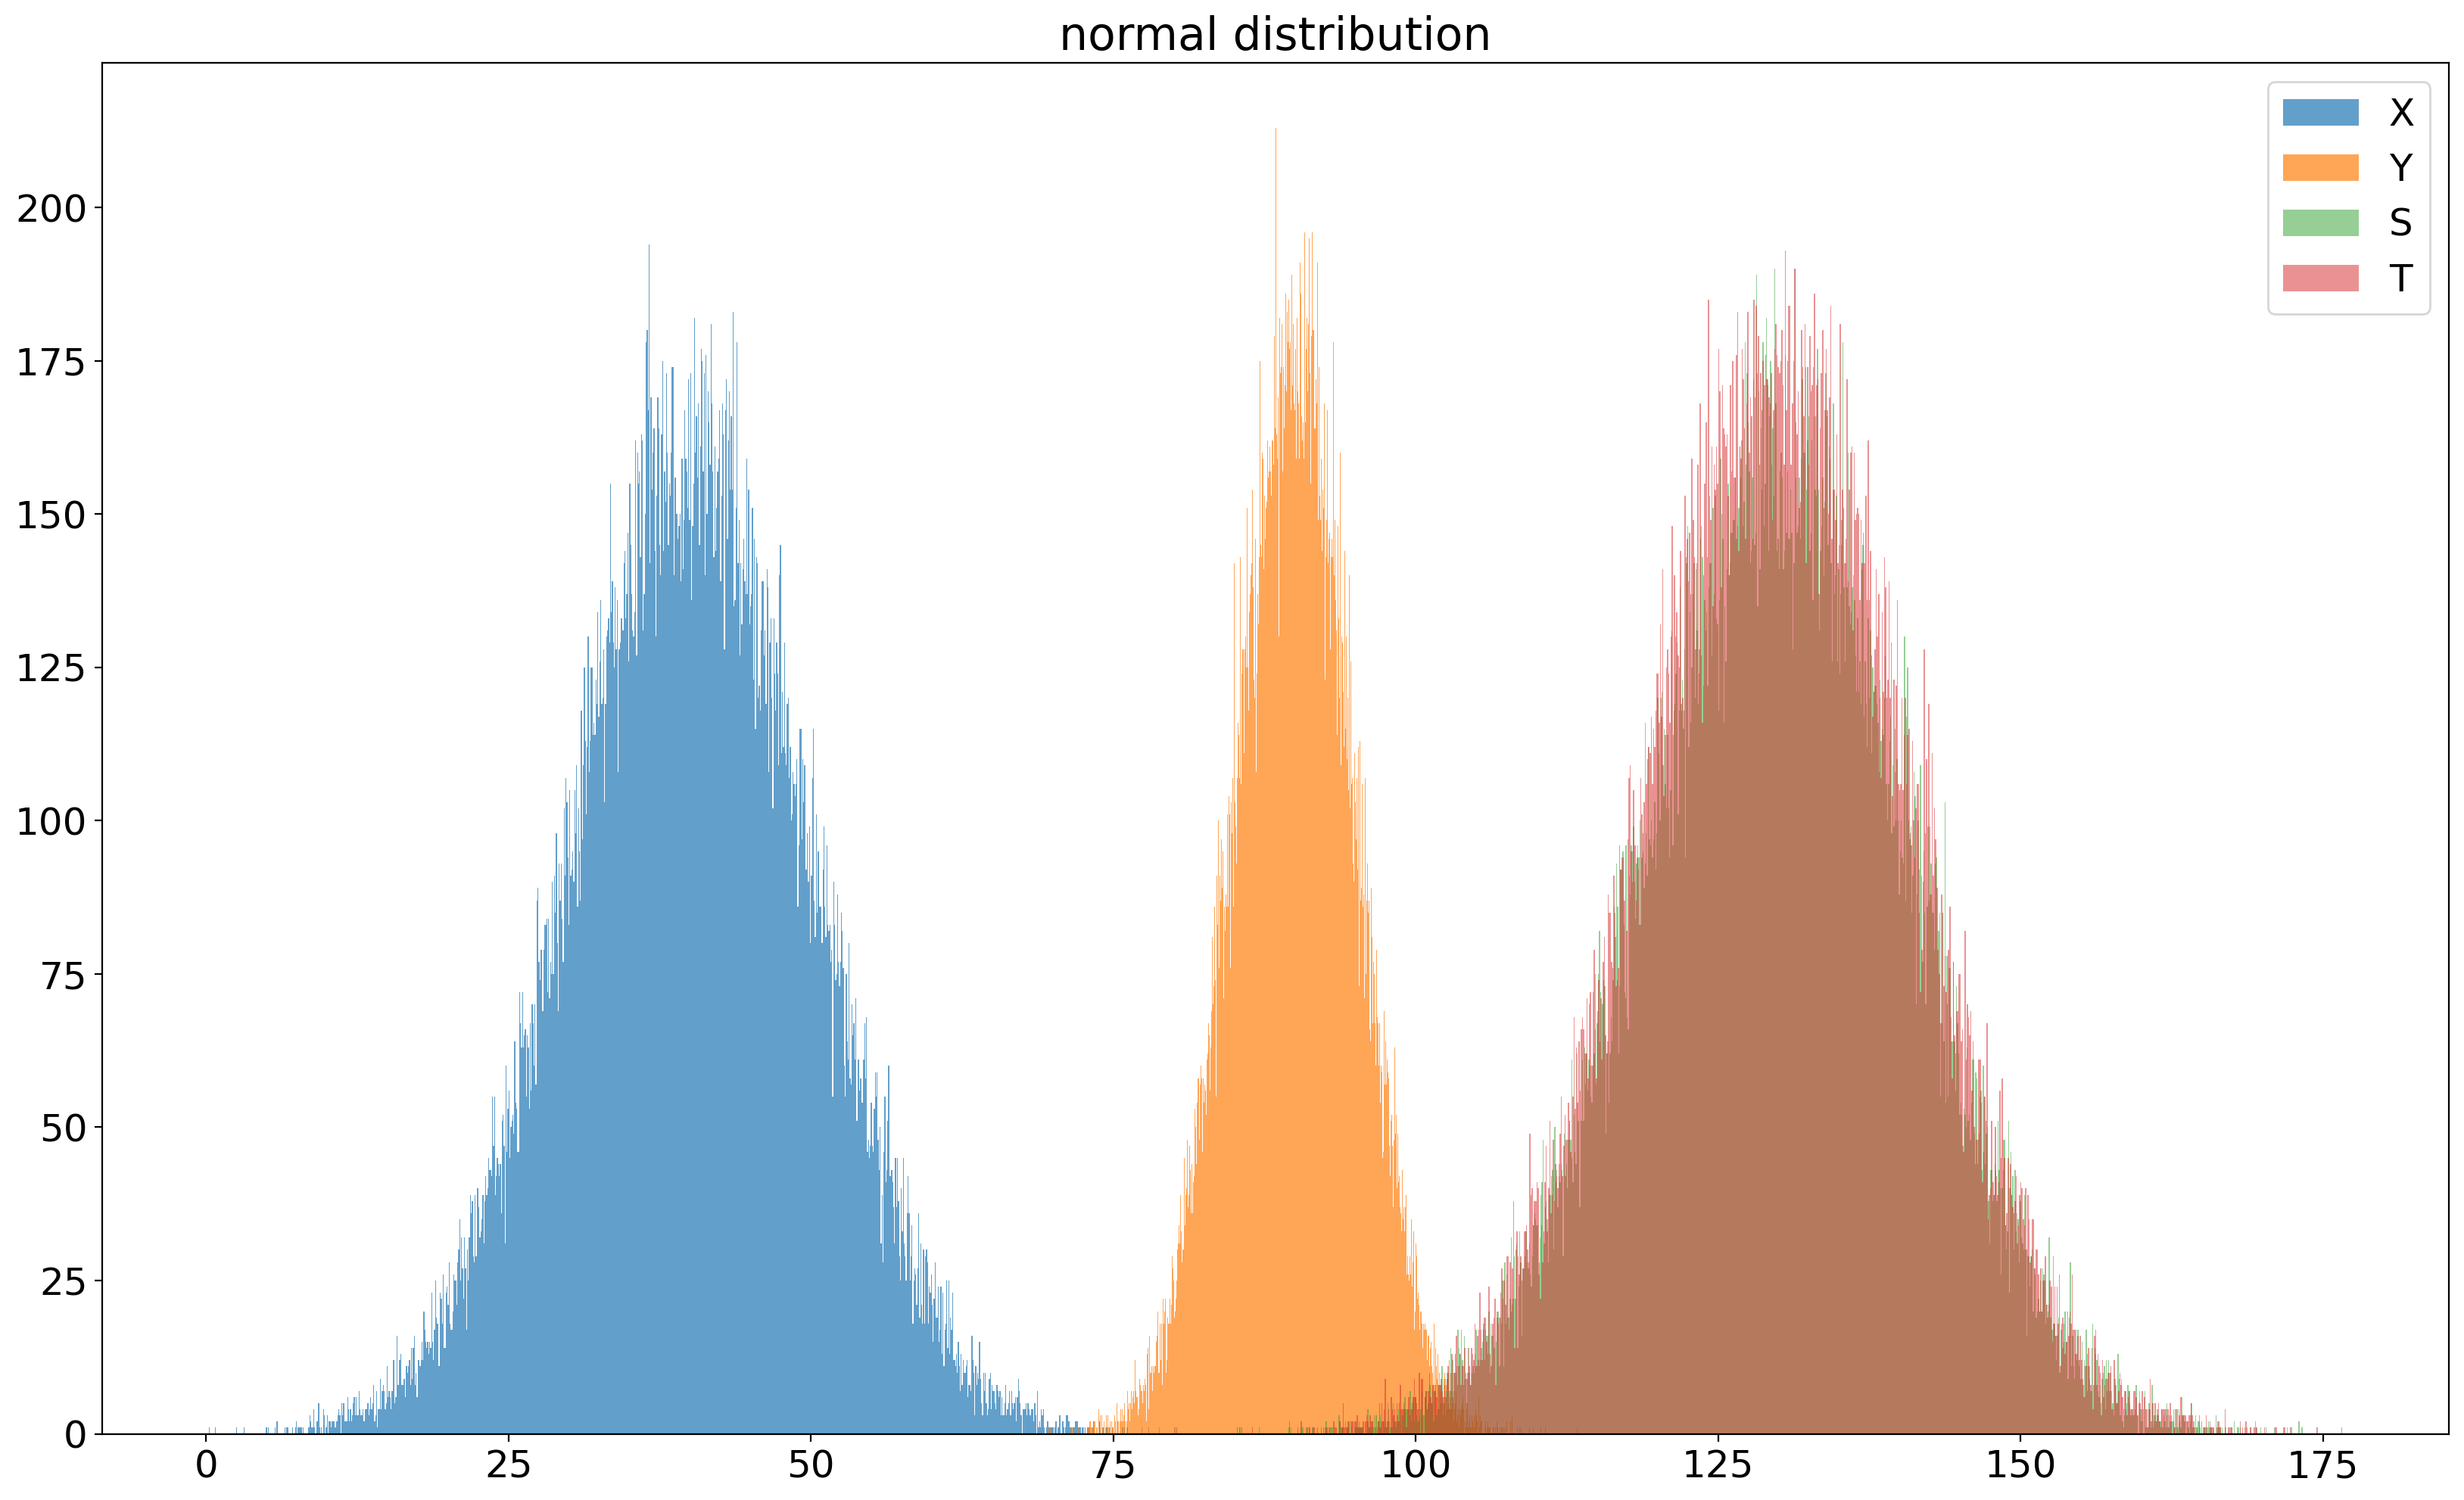

In [13]:
fig = plt.figure(figsize = (20, 12), dpi = 200)

plt.title('normal distribution')

#--parameter--
mu_X = 40
sigma_X = 10
mu_Y = 90
sigma_Y = 5
#-------------

X = np.random.normal(mu_X, sigma_X, 50000)
Y = np.random.normal(mu_Y, sigma_Y, 50000)
S = X + Y
T = np.random.normal(mu_X + mu_Y, np.sqrt(sigma_X ** 2 + sigma_Y ** 2), 50000)

plt.hist(X, bins = 1000, label = 'X', alpha = 0.7)
plt.hist(Y, bins = 1000, label = 'Y', alpha = 0.7)
plt.hist(S, bins = 1000, label = 'S', alpha = 0.5)
plt.hist(T, bins = 1000, label = 'T', alpha = 0.5)

plt.legend()
plt.show()


## ガンマ分布

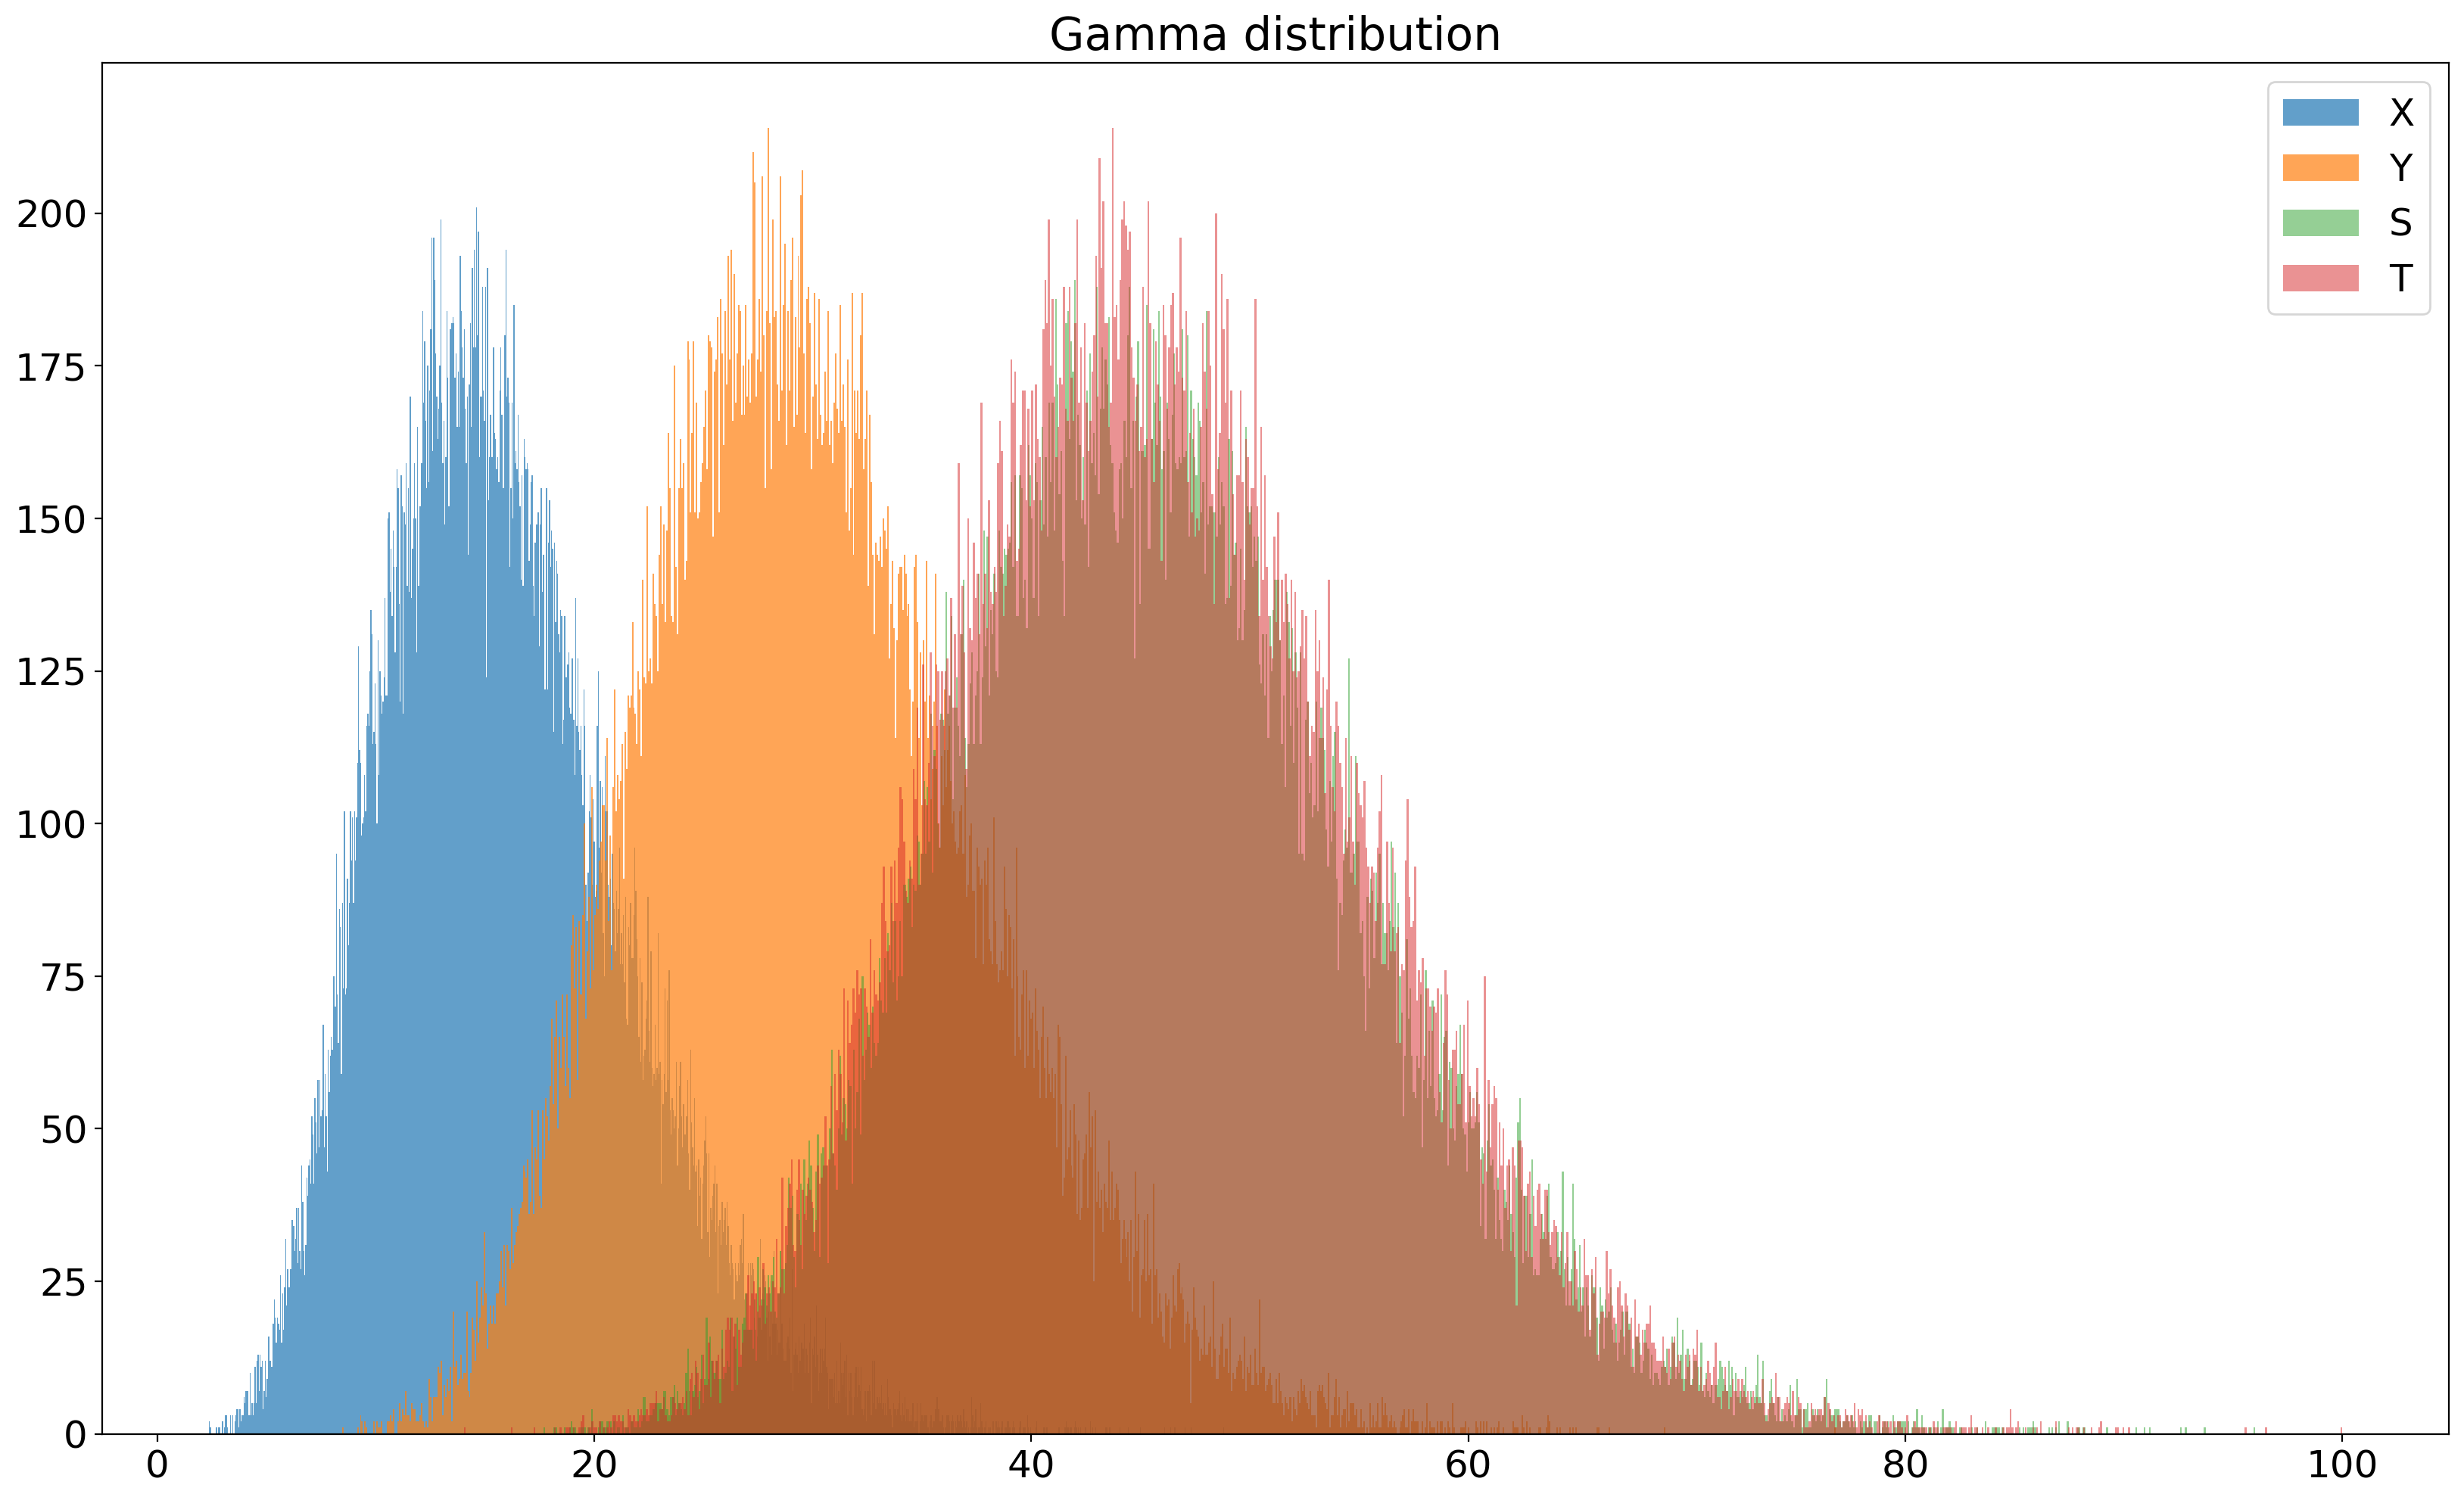

In [14]:
fig = plt.figure(figsize = (20, 12), dpi = 200)

plt.title('Gamma distribution')

#--parameter--
alpha_1 = 8
alpha_2 = 15
scale = 2
#-------------

X = np.random.gamma(alpha_1, scale, 50000)
Y = np.random.gamma(alpha_2, scale, 50000)
S = X + Y
T = np.random.gamma(alpha_1 + alpha_2, scale, 50000)

plt.hist(X, bins = 1000, label = 'X', alpha = 0.7)
plt.hist(Y, bins = 1000, label = 'Y', alpha = 0.7)
plt.hist(S, bins = 1000, label = 'S', alpha = 0.5)
plt.hist(T, bins = 1000, label = 'T', alpha = 0.5)

plt.legend()
plt.show()


## 負の二項分布

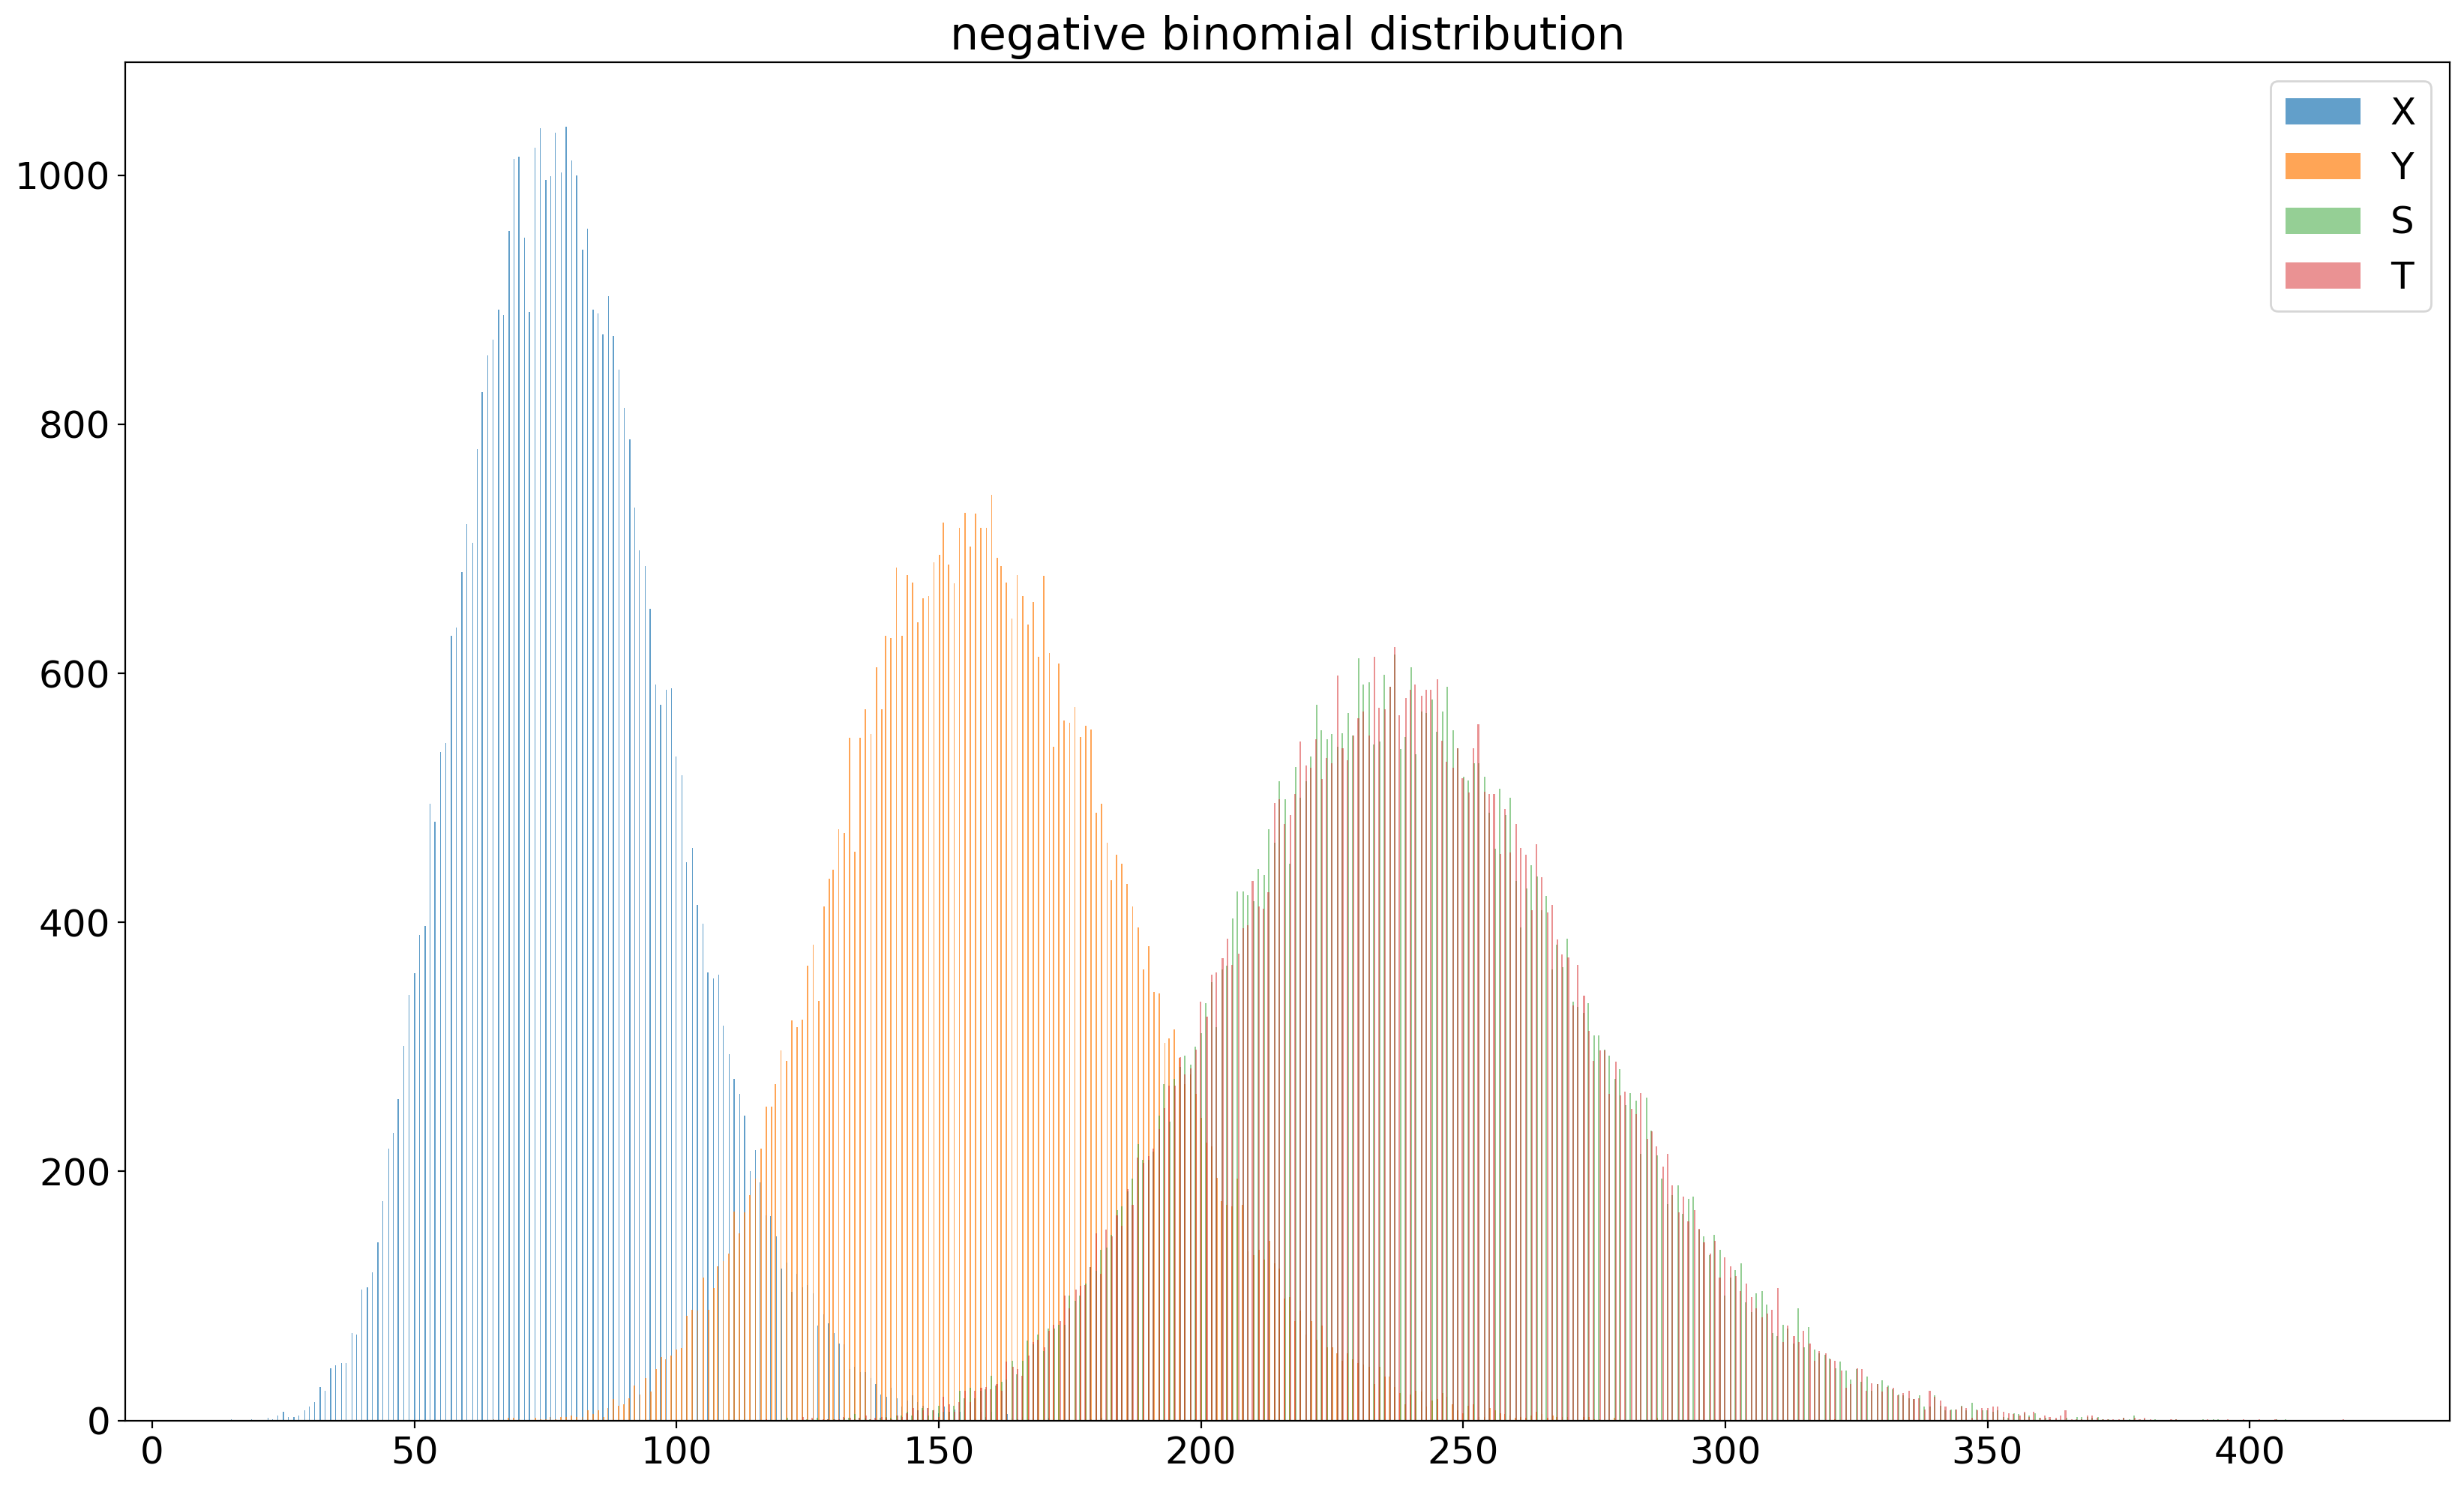

In [15]:
fig = plt.figure(figsize = (20, 12), dpi = 200)

plt.title('negative binomial distribution')

#--parameter--
k_1 = 20
k_2 = 40
p = 0.2
#-------------

X = np.random.negative_binomial(k_1, p, 50000)
Y = np.random.negative_binomial(k_2, p, 50000)
S = X + Y
T = np.random.negative_binomial(k_1 + k_2, p, 50000)

plt.hist(X, bins = 1000, label = 'X', alpha = 0.7)
plt.hist(Y, bins = 1000, label = 'Y', alpha = 0.7)
plt.hist(S, bins = 1000, label = 'S', alpha = 0.5)
plt.hist(T, bins = 1000, label = 'T', alpha = 0.5)

plt.legend()
plt.show()

## カイ二乗分布

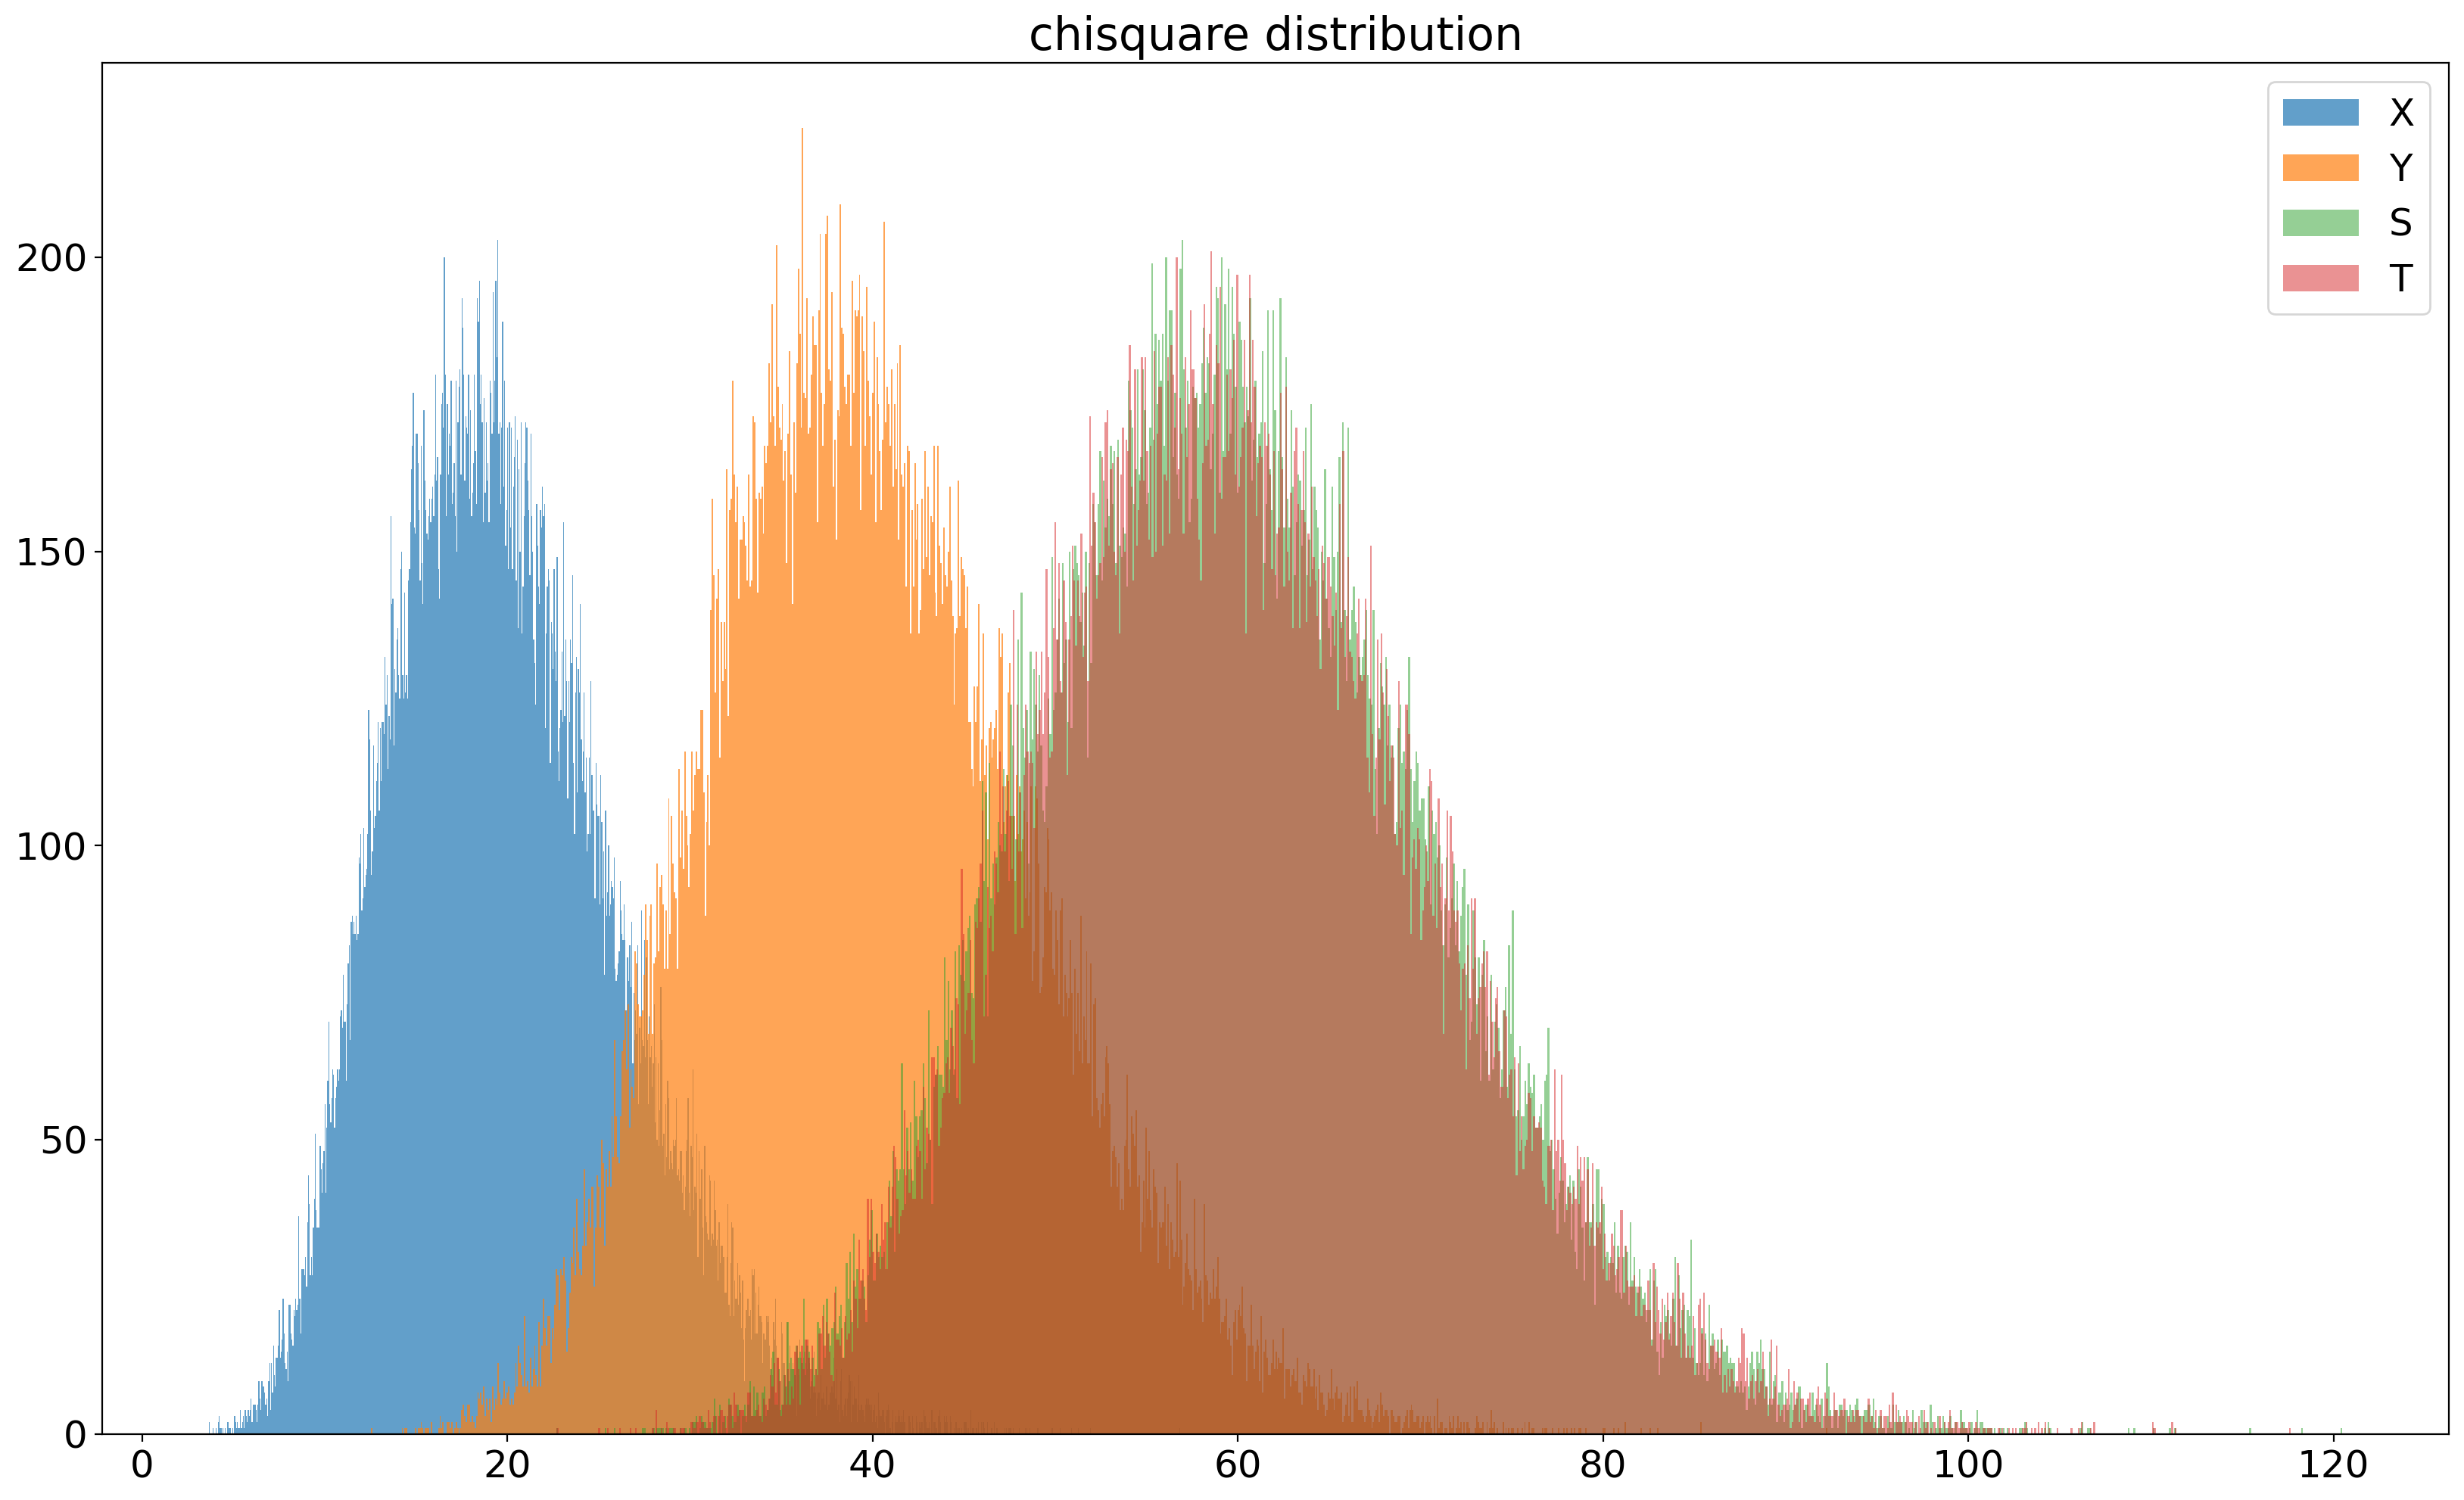

In [16]:
fig = plt.figure(figsize = (20, 12), dpi = 200)

plt.title('chisquare distribution')

#--parameter--
k_1 = 20
k_2 = 40
#-------------

X = np.random.chisquare(k_1, 50000)
Y = np.random.chisquare(k_2, 50000)
S = X + Y
T = np.random.chisquare(k_1 + k_2, 50000)

plt.hist(X, bins = 1000, label = 'X', alpha = 0.7)
plt.hist(Y, bins = 1000, label = 'Y', alpha = 0.7)
plt.hist(S, bins = 1000, label = 'S', alpha = 0.5)
plt.hist(T, bins = 1000, label = 'T', alpha = 0.5)

plt.legend()
plt.show()

## 指数分布

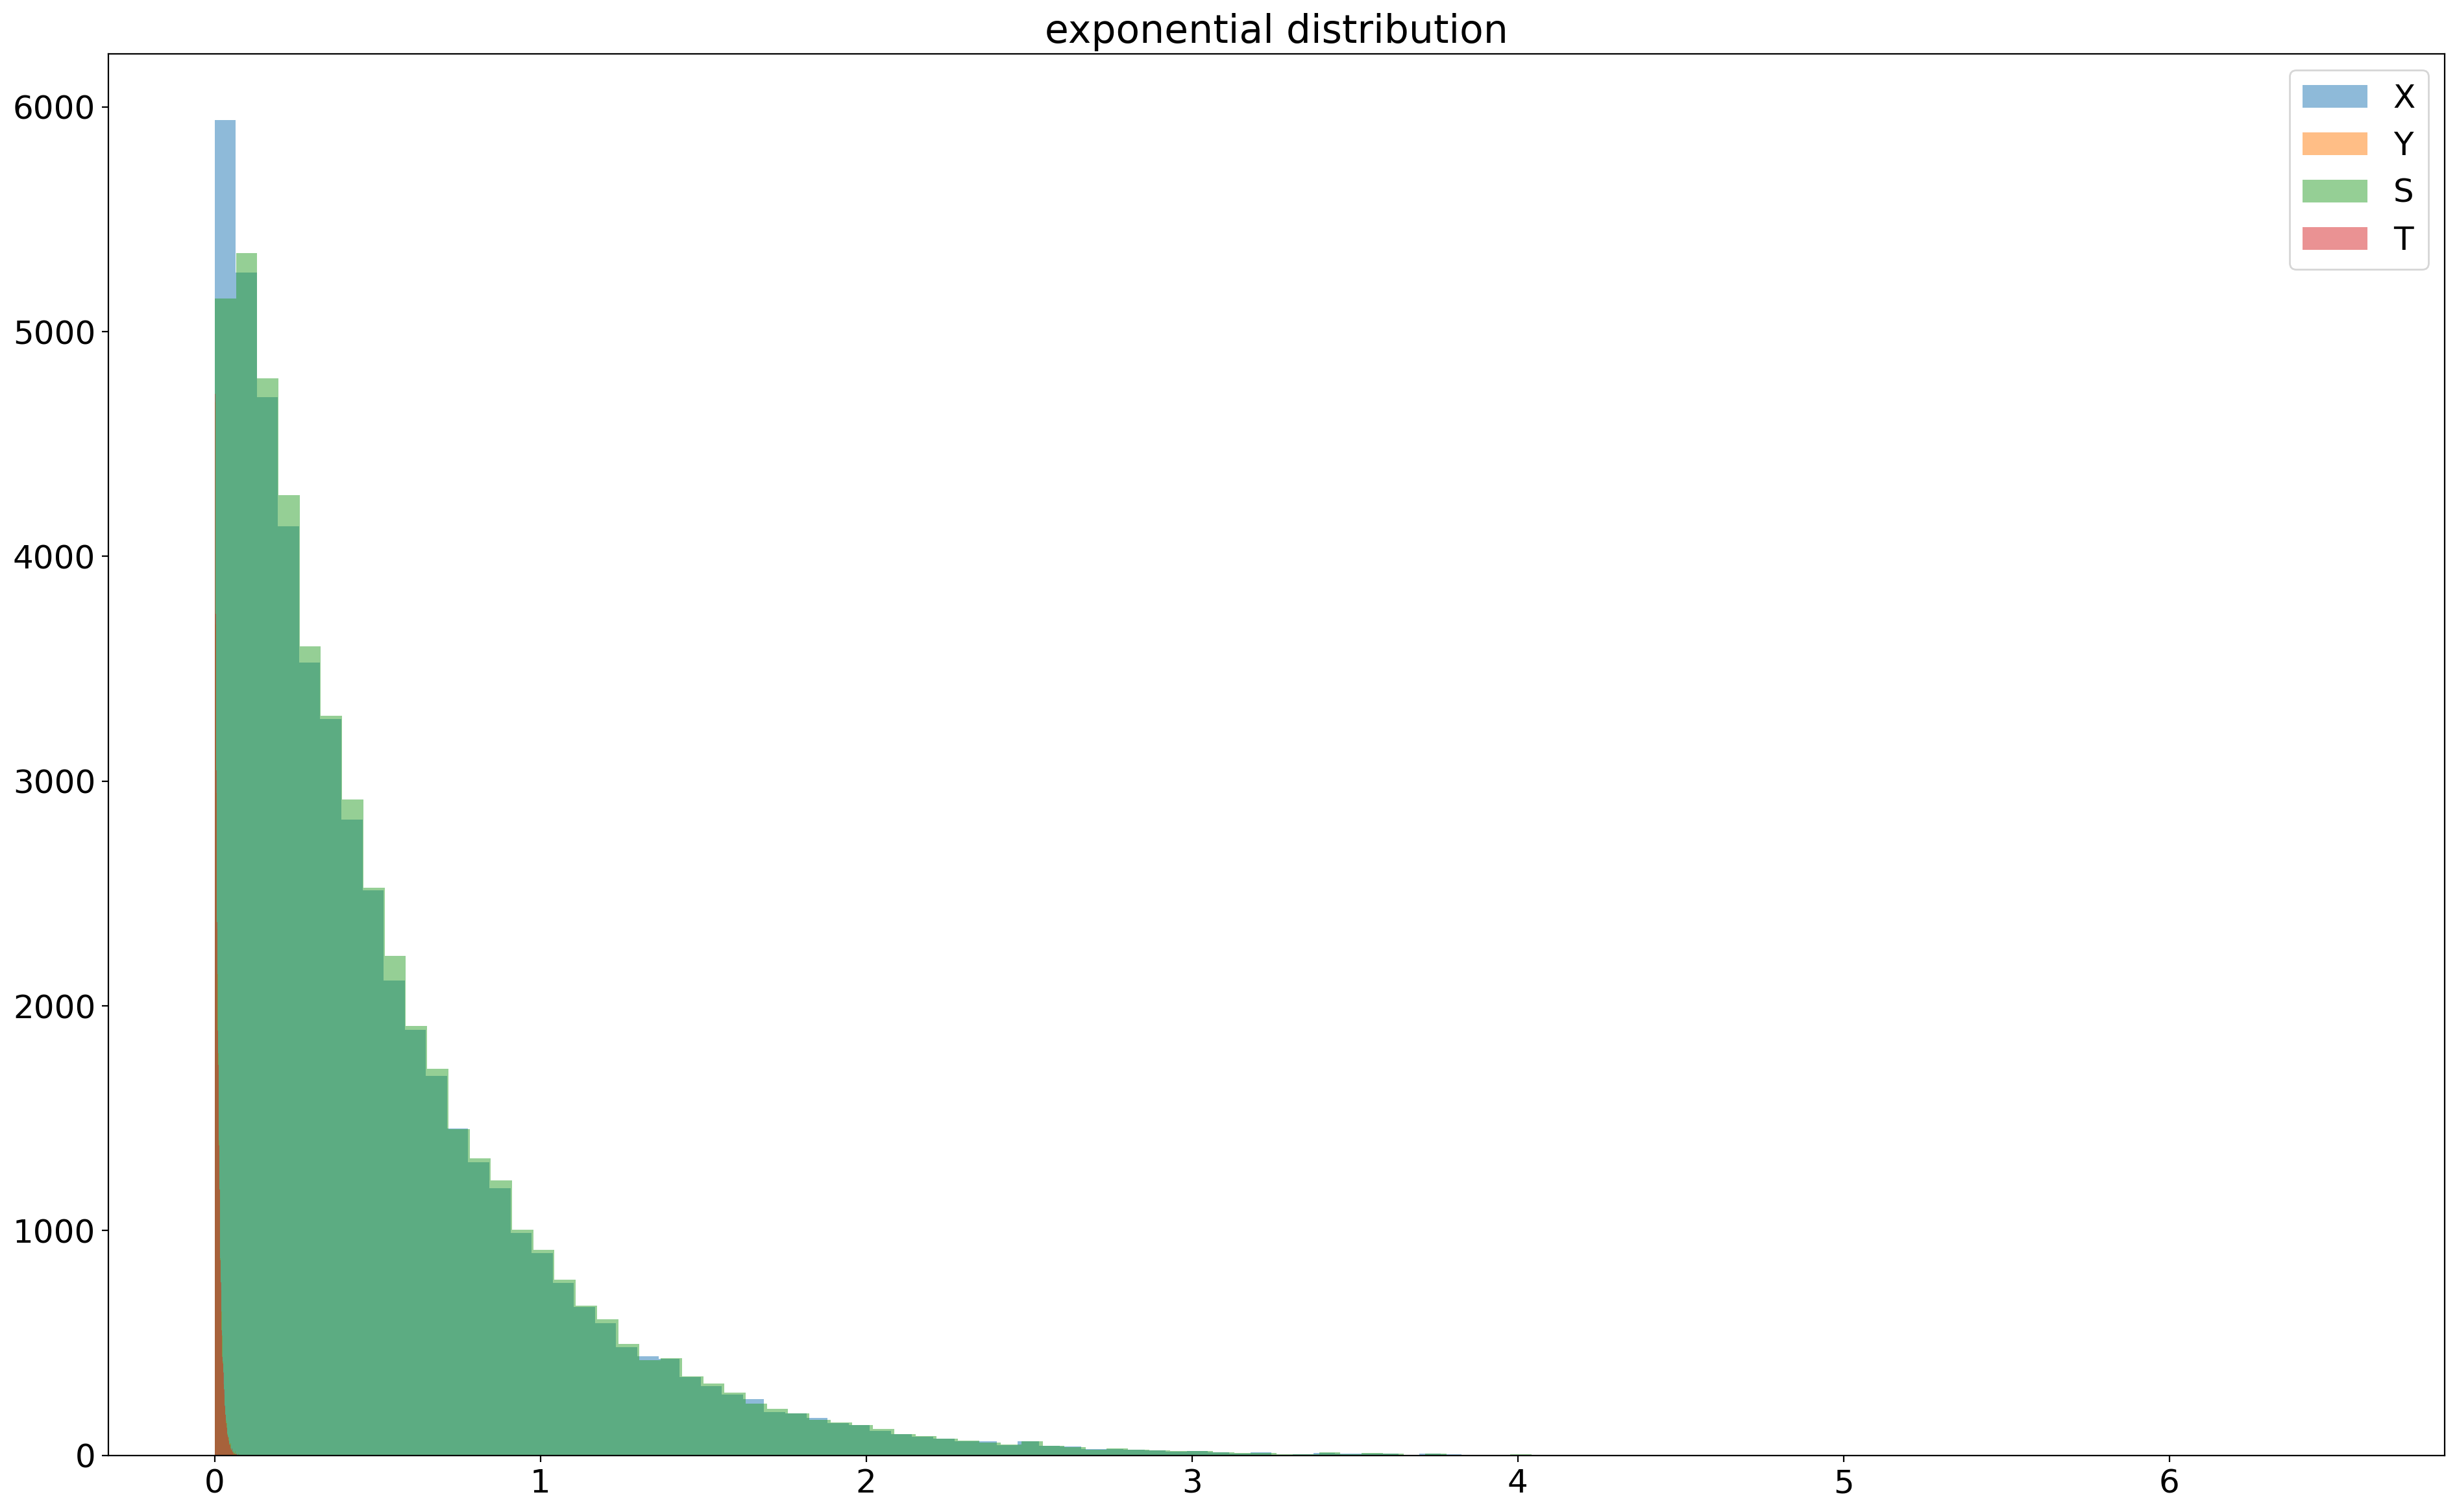

In [17]:
fig = plt.figure(figsize = (20, 12), dpi = 200)

plt.title('exponential distribution')

#--parameter--
lam_1 = 2
lam_2 = 100
#------------

X = np.random.exponential(1/lam_1, 50000)
Y = np.random.exponential(1/lam_2, 50000)
S = X + Y
T = np.random.exponential(1/(lam_1 + lam_2), 50000)

plt.hist(X, bins = 100, label = 'X', alpha = 0.5)
plt.hist(Y, bins = 100, label = 'Y', alpha = 0.5)
plt.hist(S, bins = 100, label = 'S', alpha = 0.5)
plt.hist(T, bins = 100, label = 'T', alpha = 0.5)

plt.legend()

plt.subplots_adjust(left = 0.05, right=0.95, bottom = 0.05, top = 0.95)
plt.show()

## 幾何分布

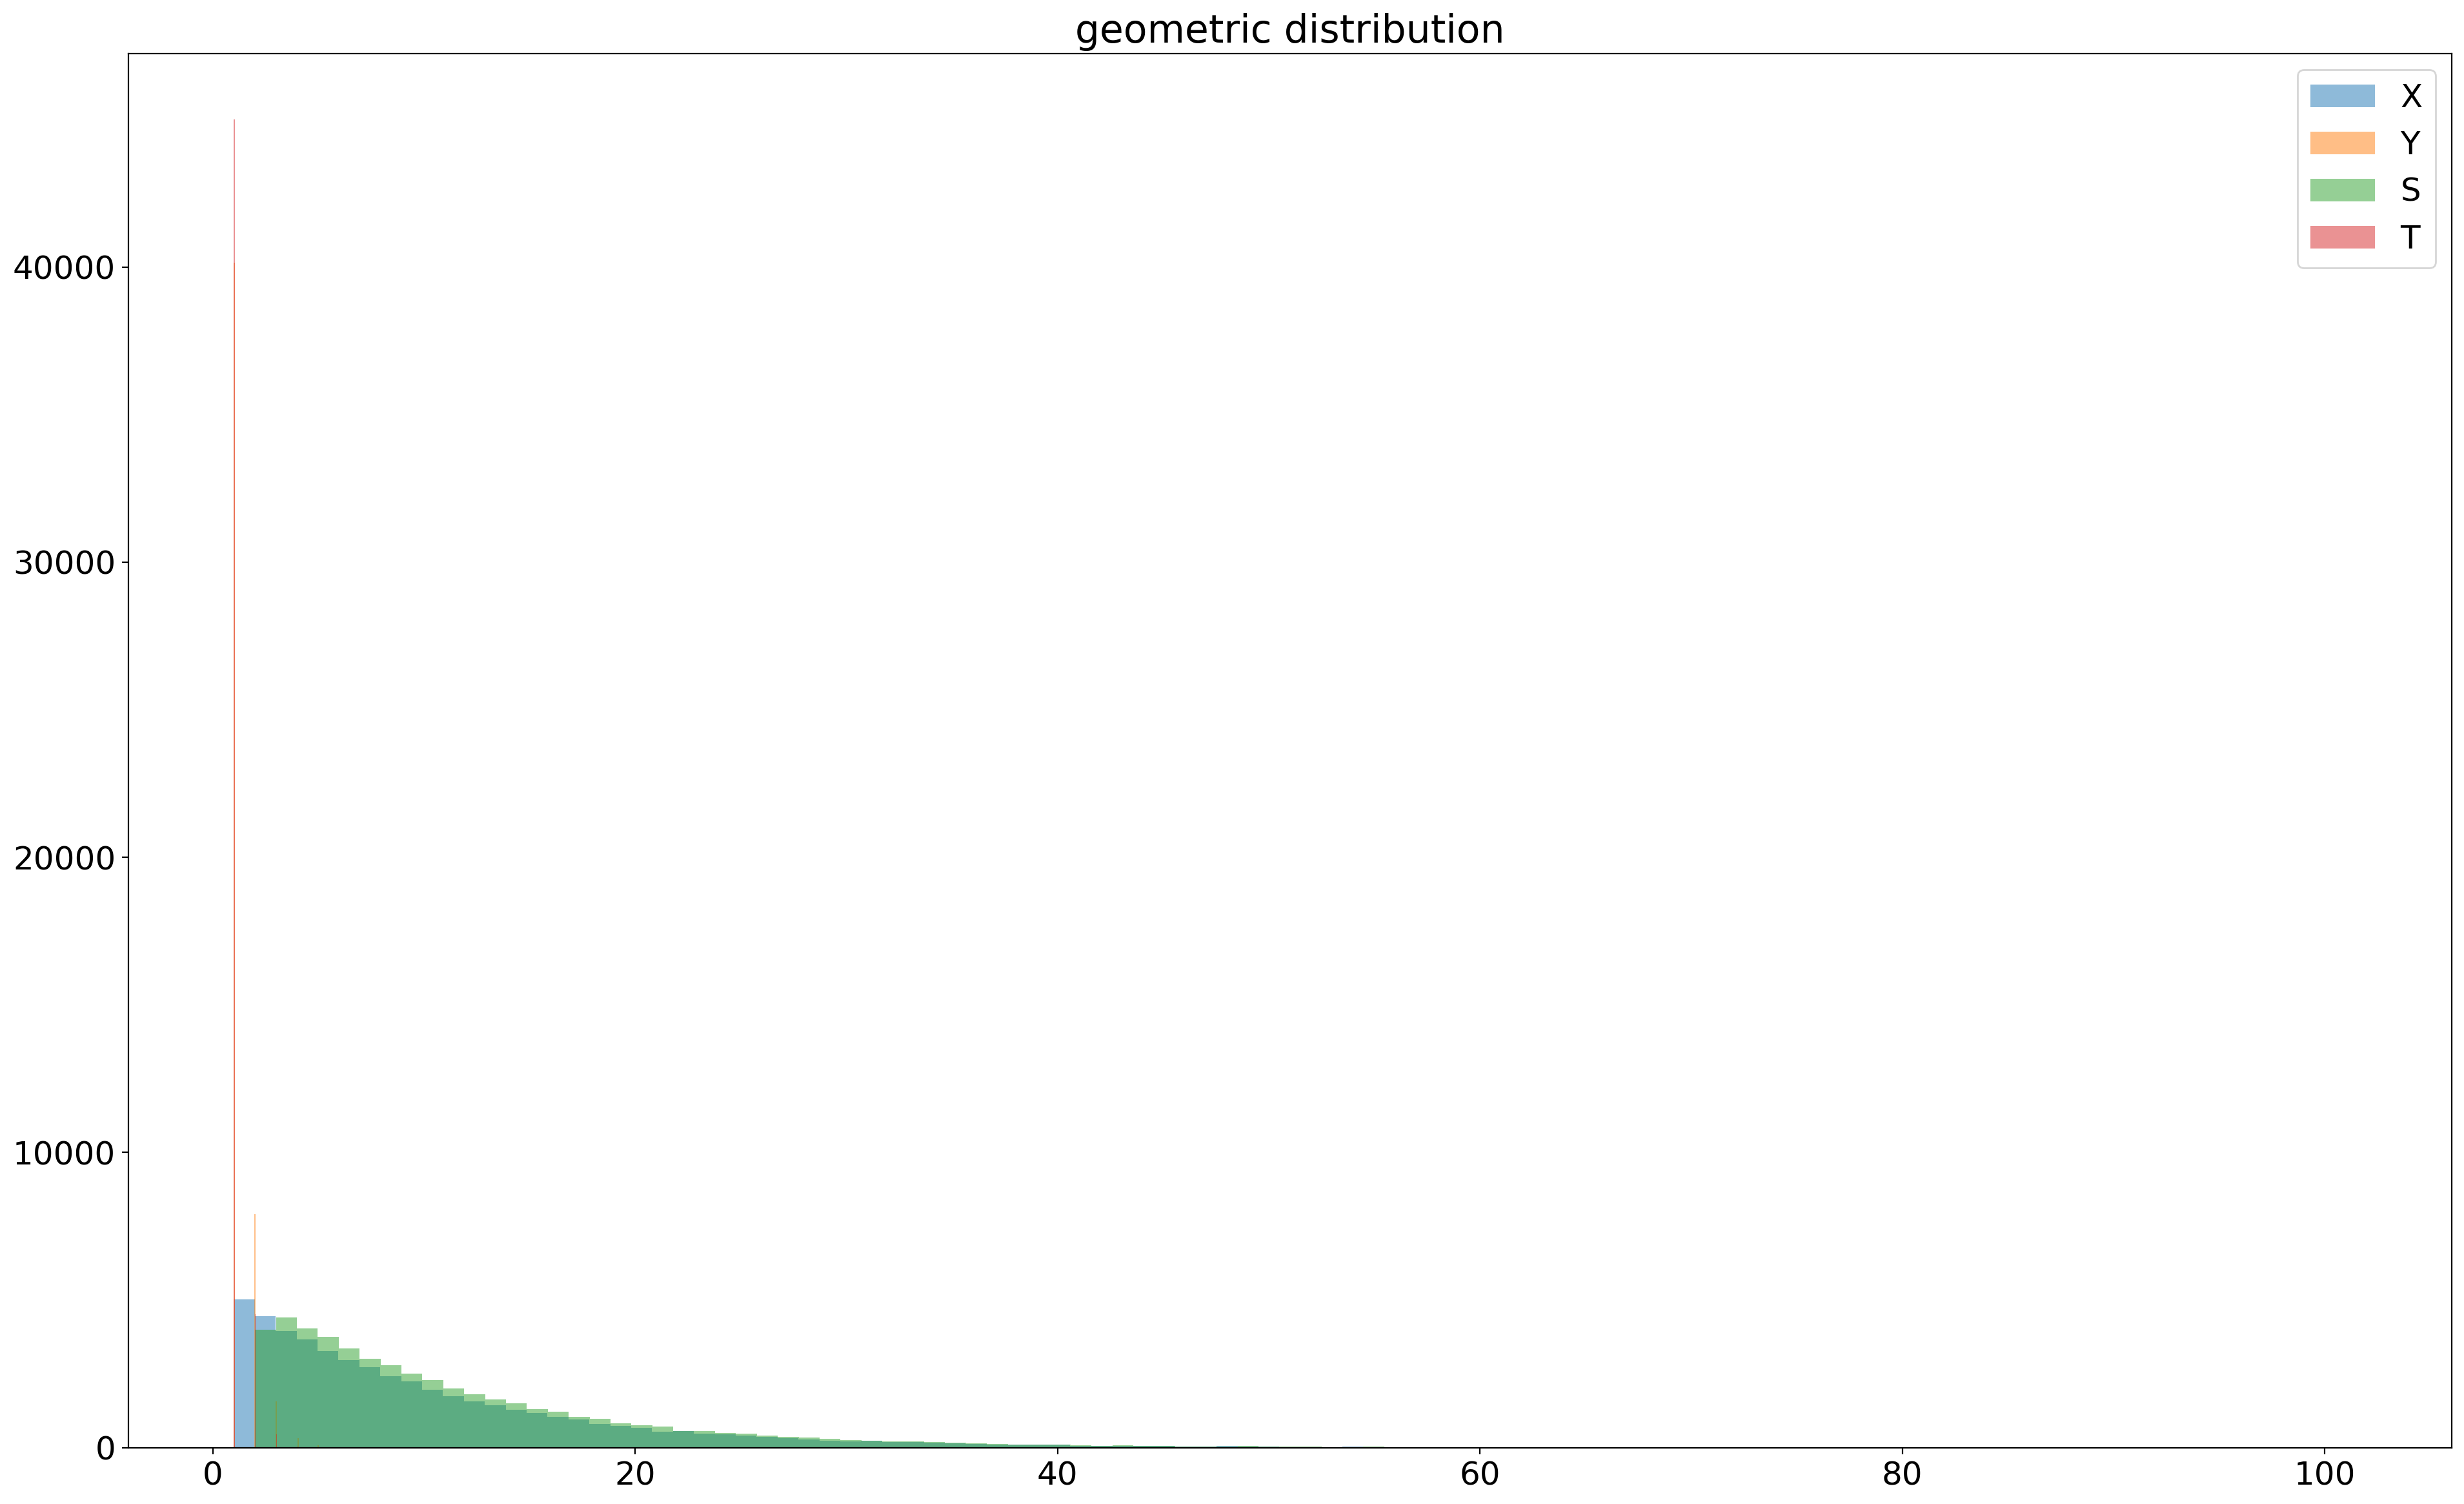

In [18]:
fig = plt.figure(figsize = (20, 12), dpi = 200)

plt.title('geometric distribution')

#--parameter--
p_1 = 0.1
p_2 = 0.8
#-------------

X = np.random.geometric(p_1, 50000)
Y = np.random.geometric(p_2, 50000)
S = X + Y
T = np.random.geometric(p_1 + p_2, 50000)

plt.hist(X, bins = 100, label = 'X', alpha = 0.5)
plt.hist(Y, bins = 100, label = 'Y', alpha = 0.5)
plt.hist(S, bins = 100, label = 'S', alpha = 0.5)
plt.hist(T, bins = 100, label = 'T', alpha = 0.5)

plt.legend()

plt.subplots_adjust(left = 0.05, right=0.95, bottom = 0.05, top = 0.95)
plt.show()

# 3.中心極限定理

中心極限定理をコンピューター・シミュレーションで確認する．

## 分布の収束

nの値を増やすことでどのような分布になるか調べる．

ここで，ヒストグラムの帯の面積の和は1となるように設定しており，オレンジの線は各分布の期待値，分散をパラメータとする理想的な正規分布である．

方法としては，各分布に従う乱数をn個生成して，その平均を求めることを1000回行い，それらのヒストグラムを作成した．

参考にしたサイト：
https://qiita.com/y629/items/fe10cb5f0826f4fcbd53  (errorはいたけど，少しいじったら使えた．)

### 一様分布

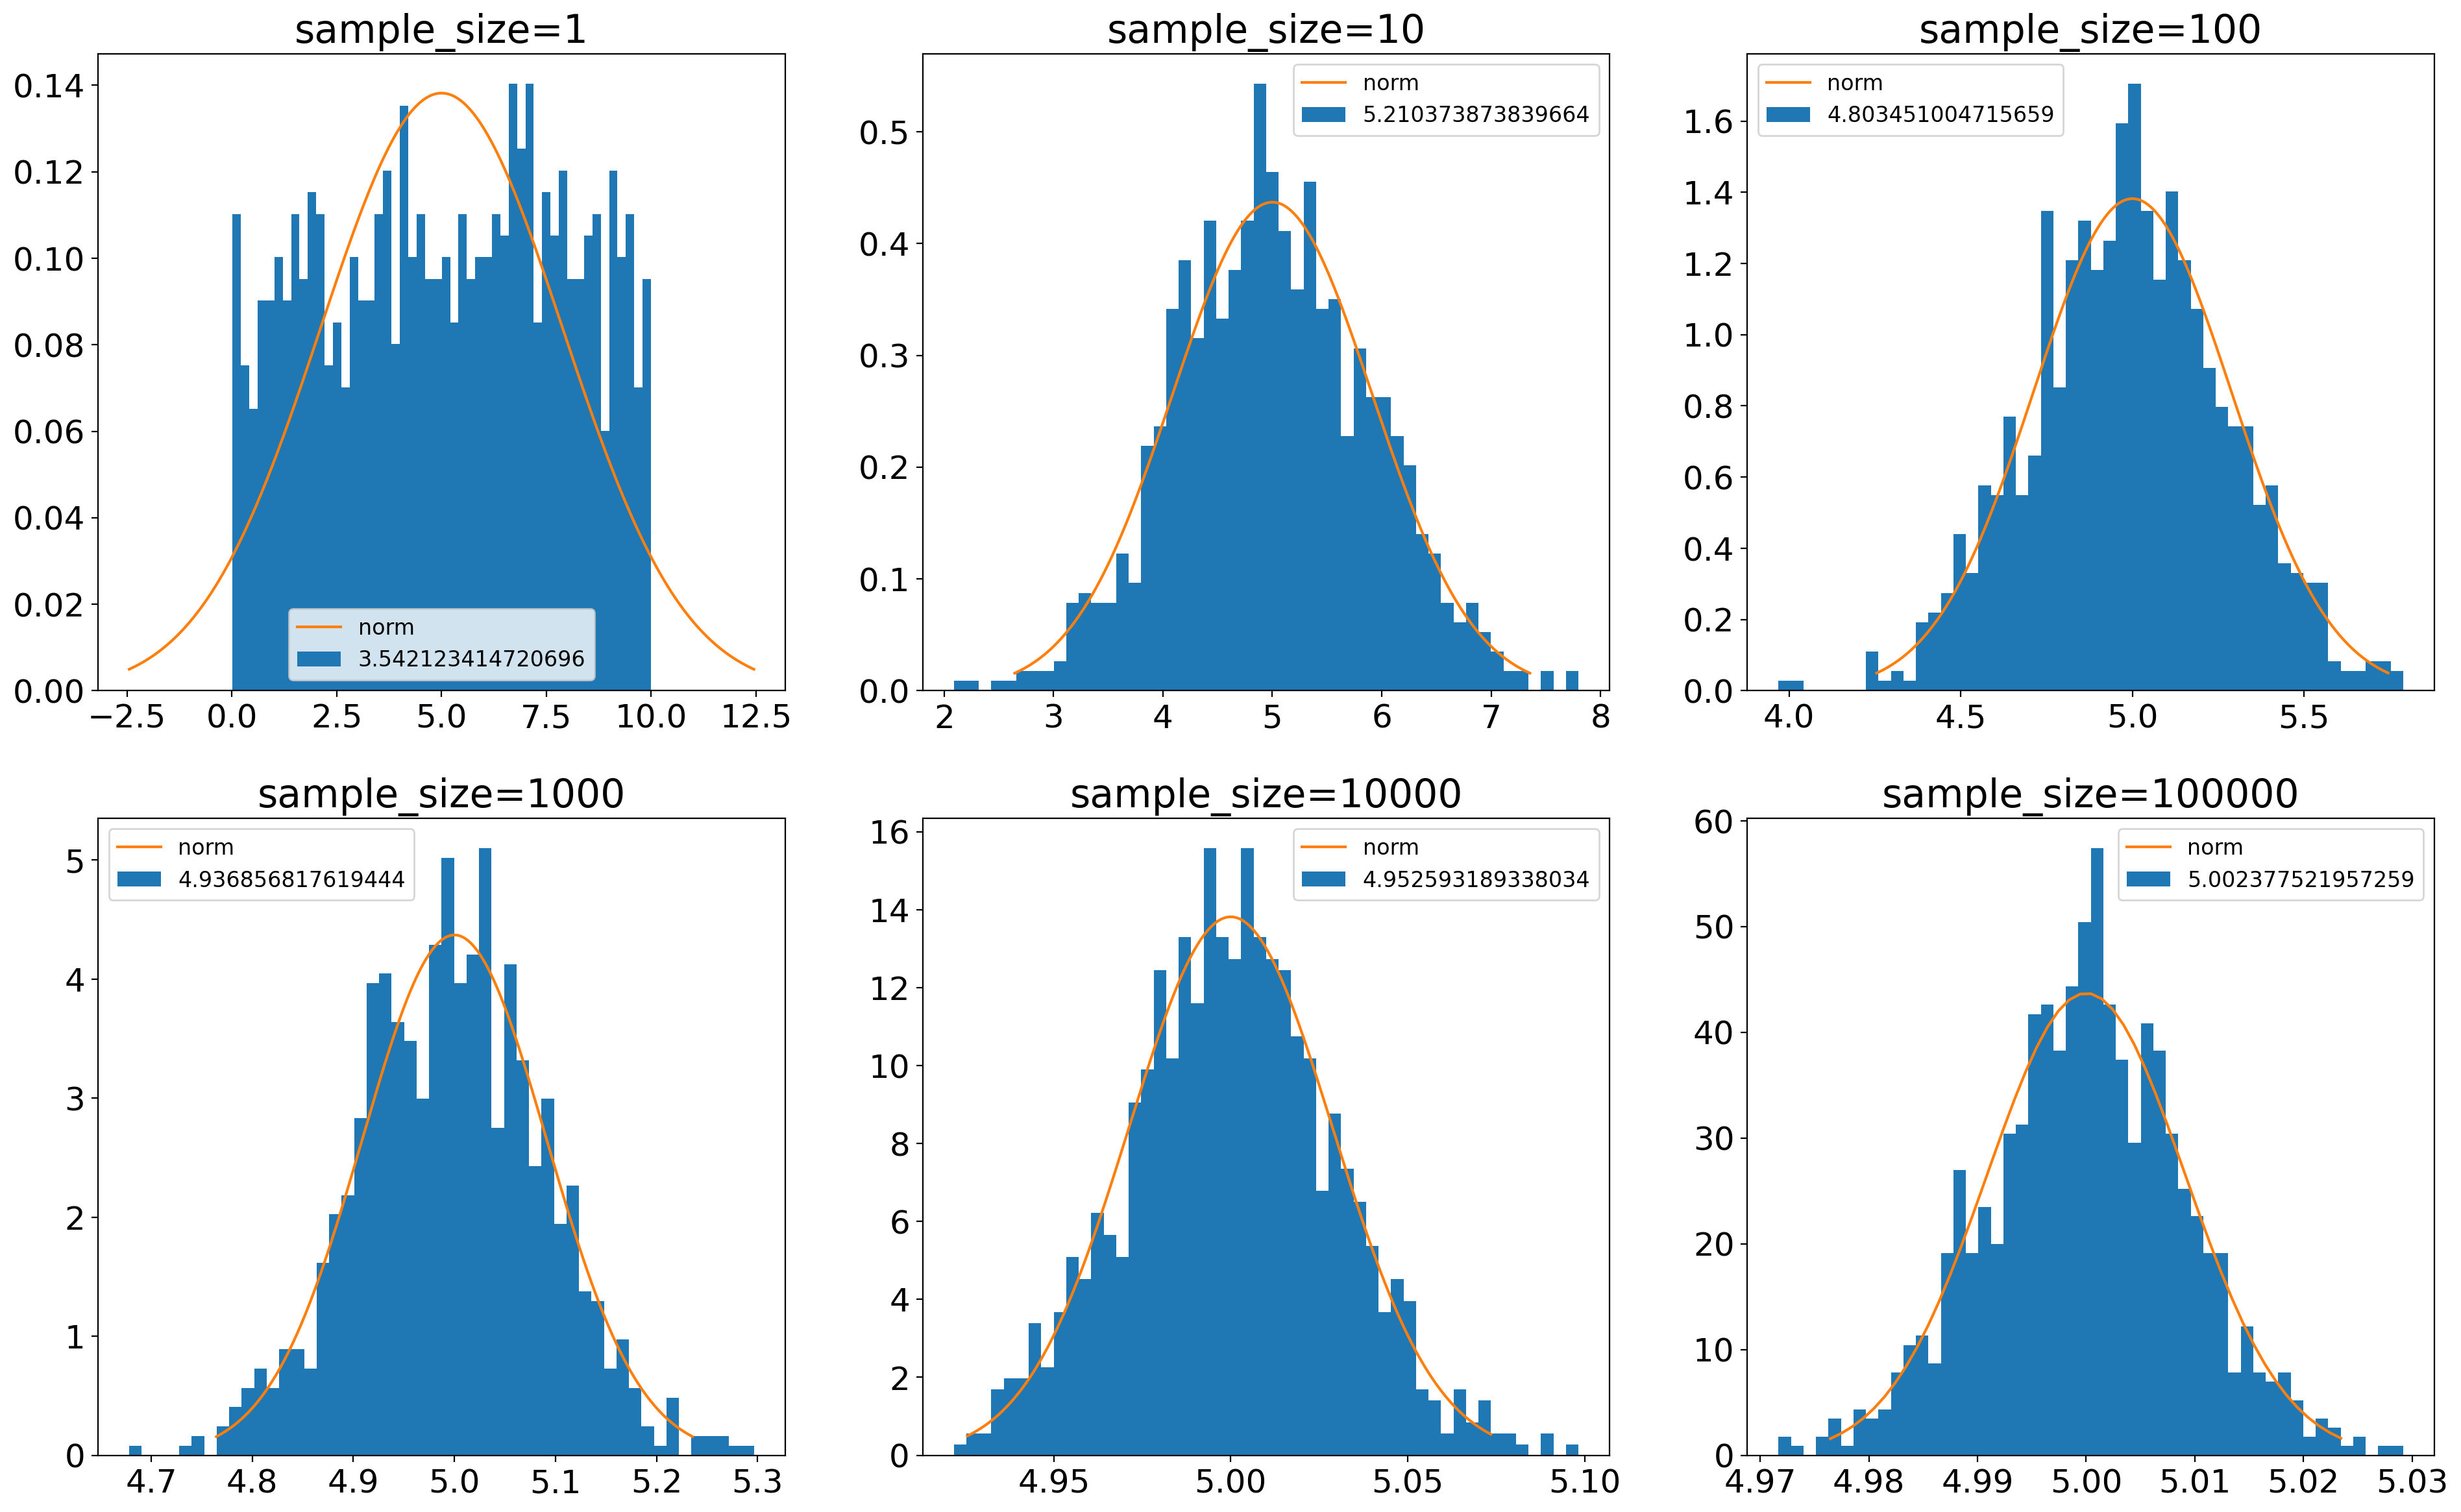

In [19]:
fig = plt.figure(figsize = (20, 12), dpi = 200)

sample_size = [1, 10, 100, 1000, 10000, 100000]

loc = 0
scale = 10

for i, n in enumerate(sample_size):
    ax = fig.add_subplot(2, 3, i+1)
    plt.title(f'sample_size={n}')
    
    means = [np.mean(stats.uniform.rvs(loc = loc, scale = scale, size = n)) for _ in range(1000)]
    
    mu = stats.uniform.mean(loc, scale)
    var = stats.uniform.var(loc, scale)
    
    plt.hist(means, label = means, bins = 50, density = True)
    x = np.arange(mu - 2.58 * (var / n) **0.5, mu + 2.58 * (var / n) **0.5, 0.001)
    norm_vals = stats.norm.pdf(x, loc = mu, scale = (var / n) ** 0.5)
    
    plt.plot(x, norm_vals, label = 'norm')
    plt.legend(fontsize = 12)
plt.subplots_adjust(left = 0.05, right=0.95, bottom = 0.05, top = 0.95)
plt.show()

## 二項分布

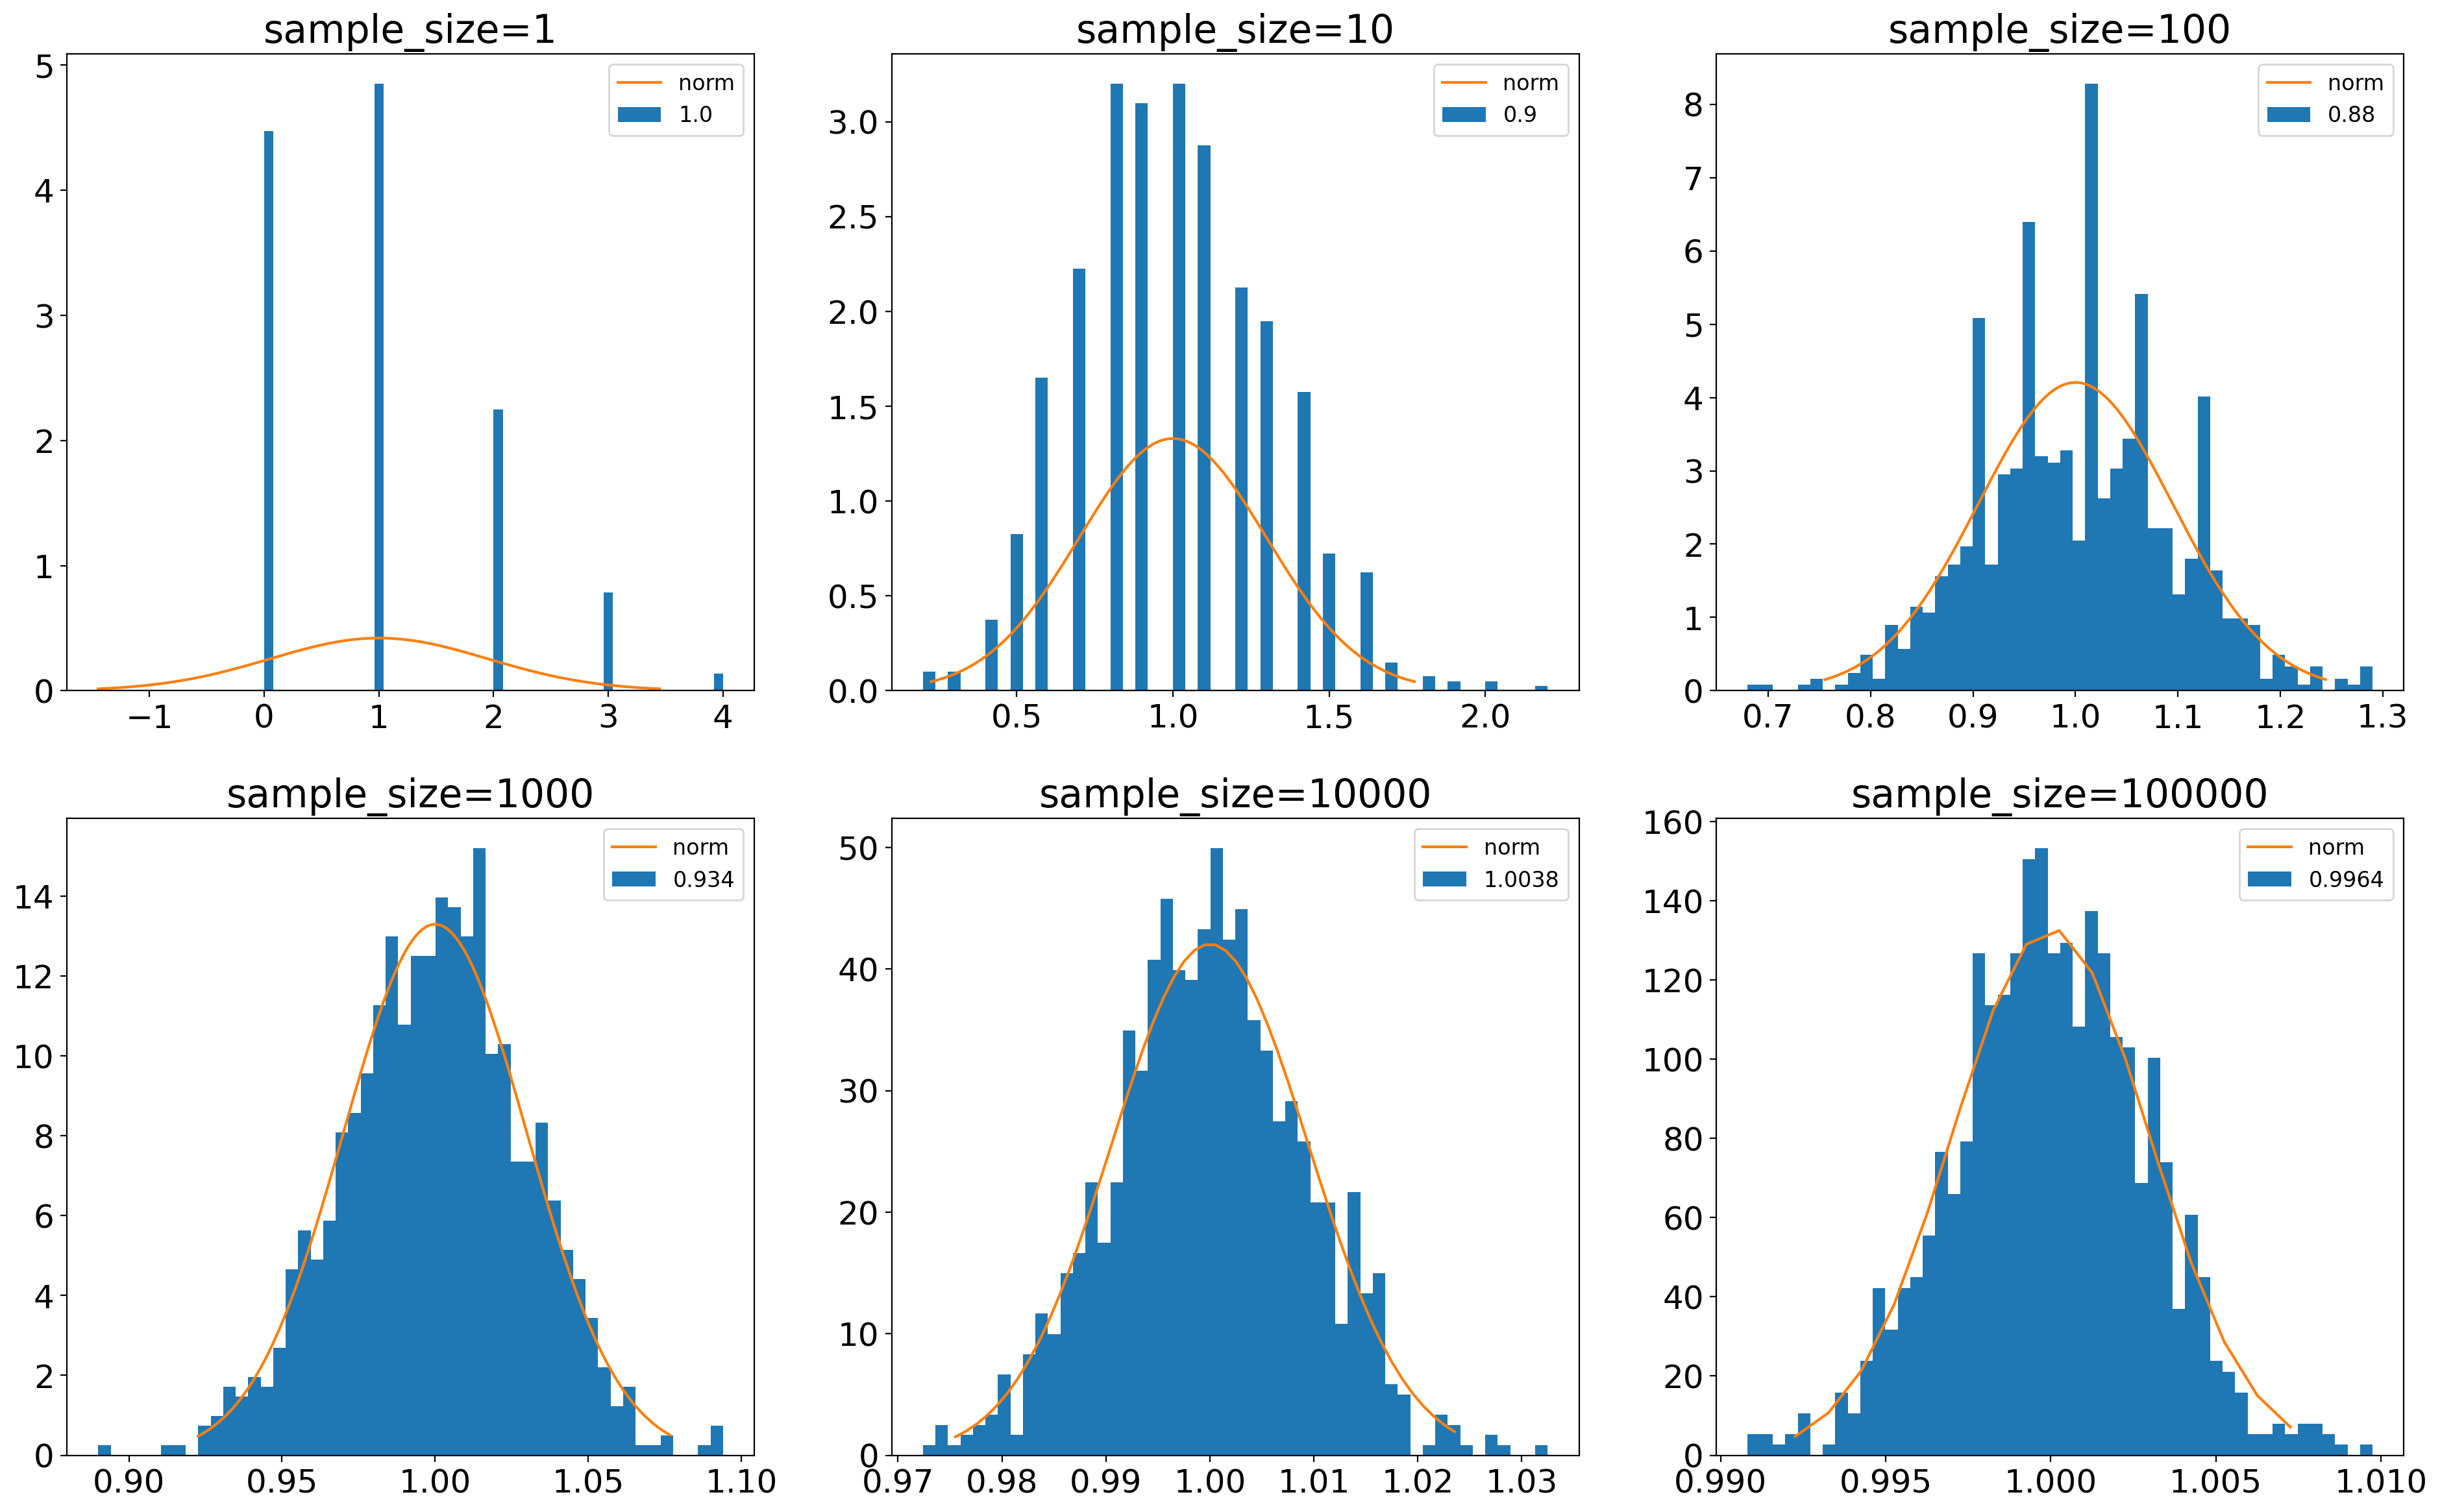

In [20]:
fig = plt.figure(figsize = (20, 12), dpi=200)

sample_size = [1, 10, 100, 1000, 10000, 100000]

param_n = 10
p = 0.1

for i, n in enumerate(sample_size):
    ax = fig.add_subplot(2, 3, i+1)
    plt.title(f'sample_size={n}')
    
    means = [np.mean(stats.binom.rvs(n = param_n, p = p, size = n)) for _ in range(1000)]
    
    mu = stats.binom.mean(param_n, p)
    var = stats.binom.var(param_n, p)
    
    plt.hist(means, label = means, bins = 50, density = True)
    x = np.arange(mu - 2.58 * (var / n) **0.5, mu + 2.58 * (var / n) **0.5, 0.001)
    norm_vals = stats.norm.pdf(x, loc = mu, scale = (var / n) ** 0.5)
    plt.plot(x, norm_vals, label = 'norm')
    plt.legend(fontsize = 12)
plt.subplots_adjust(left = 0.05, right=0.95, bottom = 0.05, top = 0.95)
plt.show()

## コーシー分布

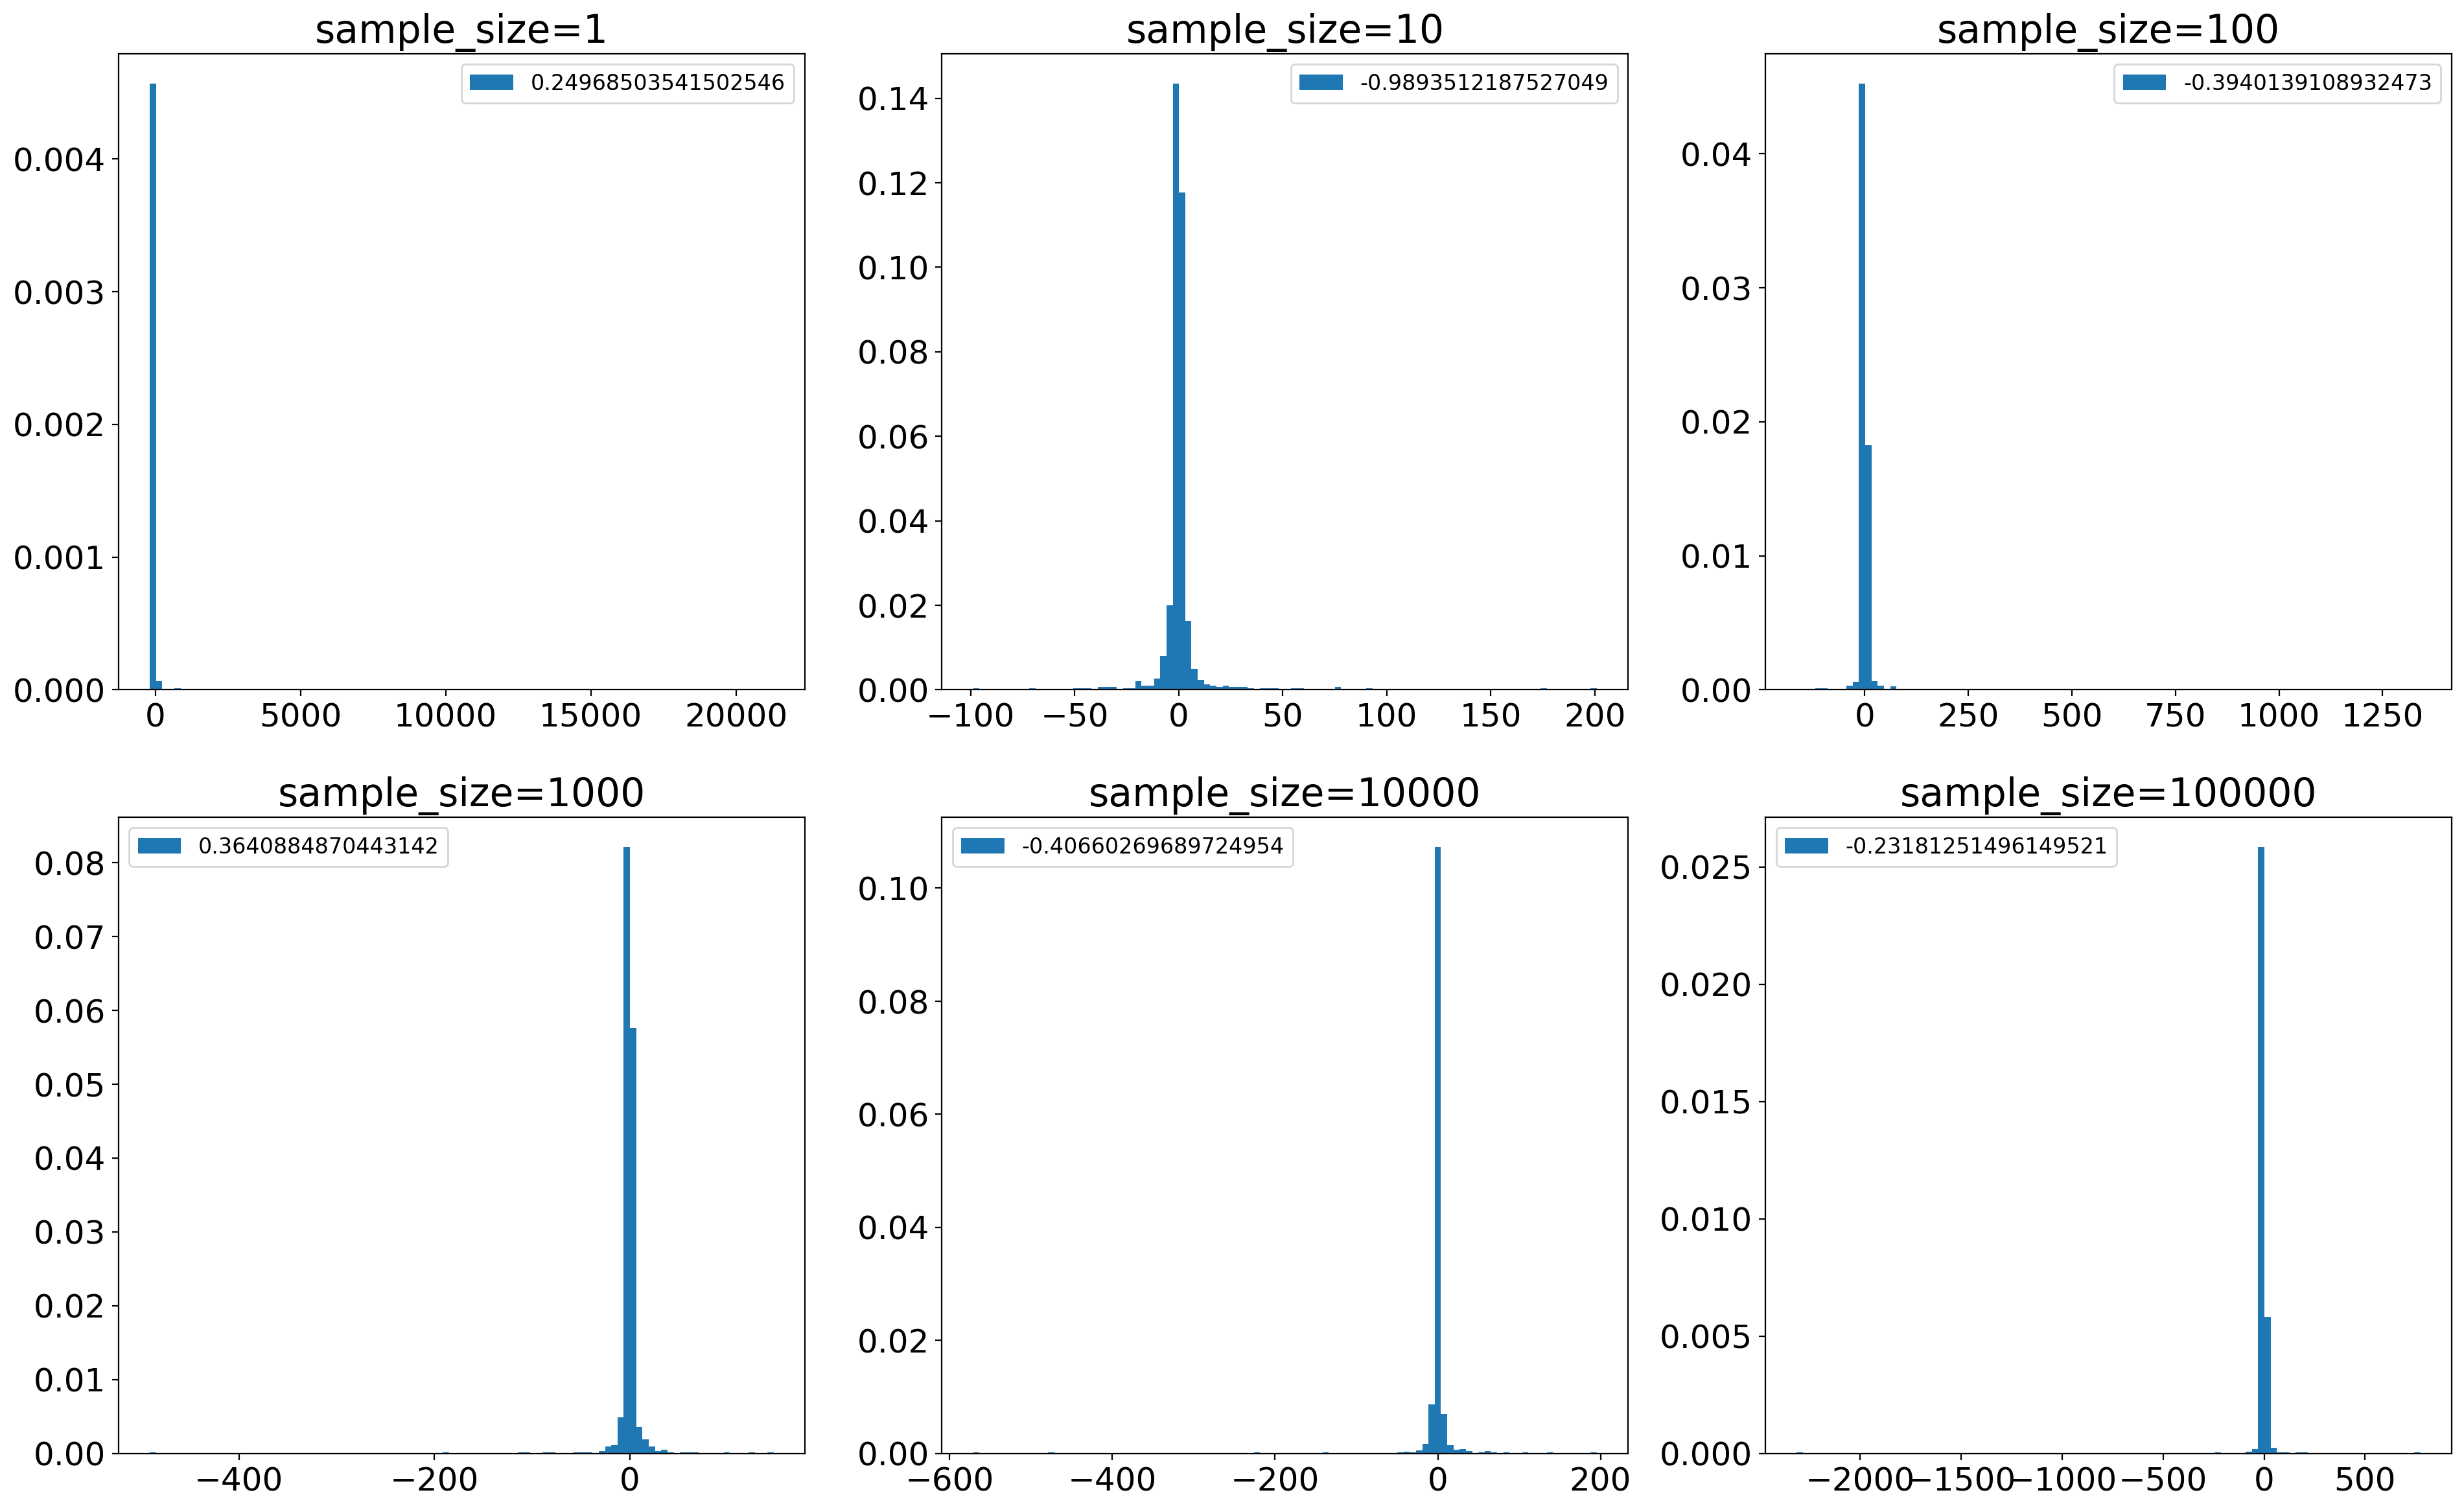

In [21]:
fig = plt.figure(figsize = (20, 12), dpi=200)

sample_size = [1, 10, 100, 1000, 10000, 100000]

#no parameter

for i, n in enumerate(sample_size):
    ax = fig.add_subplot(2, 3, i+1)
    plt.title(f'sample_size={n}')
    
    means = [np.mean(stats.cauchy.rvs(size = n)) for _ in range(1000)]
    
    plt.hist(means, label = means, density = True,bins = 100)

    plt.legend(fontsize = 12)
plt.subplots_adjust(left = 0.05, right=0.95, bottom = 0.05, top = 0.95)
plt.show()

コーシー分布は期待値・分散が存在しないため，中心極限定理は成立しない．

## 標準偏差とサンプルサイズの関係

方法としては，各分布に従う乱数をn個生成して，その平均を求めることを1000回行い，nとそれらの標準偏差と両対数グラフにプロットした．

### 一様分布

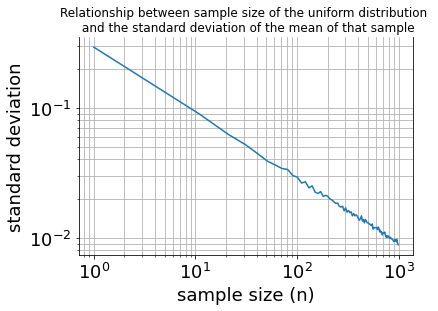

In [22]:
sample_size = list(range(1,1001,10))
stdev = []
low = 0.0
high = 1.0
for n in sample_size:
    means = [np.mean(np.random.uniform(low = low, high = high, size = n)) for _ in range(1000)]
    stdev.append(st.stdev(means))
plt.plot(sample_size,stdev)
ax=plt.gca()
ax.spines['top'].set_color('none')
#両対数グラフ
ax.set_yscale('log')
ax.set_xscale('log')
plt.title('Relationship between sample size of the uniform distribution \n and the standard deviation of the mean of that sample', fontsize = 12)
plt.xlabel('sample size (n)',fontsize=18)
plt.ylabel('standard deviation',fontsize=18)
plt.grid(which='both')
plt.show()

### 二項分布

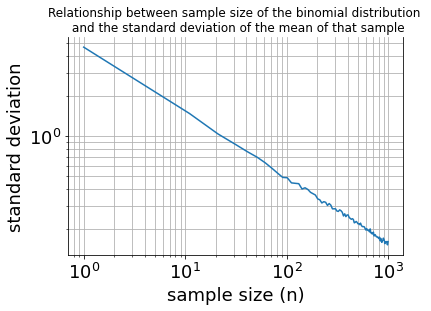

In [23]:
sample_size = list(range(1, 1001, 10))
stdev = []
"""
random.binomial(n, p, size=None)
"""
param_n = 100
p = 0.4
for n in sample_size:
    means = [np.mean(np.random.binomial(param_n,p,size=n)) for _ in range(1000)]
    stdev.append(st.stdev(means))
plt.plot(sample_size,stdev)
ax=plt.gca()
ax.spines['top'].set_color('none')
#両対数グラフ
ax.set_yscale('log')
ax.set_xscale('log')
plt.title('Relationship between sample size of the binomial distribution \n and the standard deviation of the mean of that sample', fontsize = 12)
plt.xlabel('sample size (n)',fontsize=18)
plt.ylabel('standard deviation',fontsize=18)
plt.grid(which='both')
plt.show()

### 指数分布

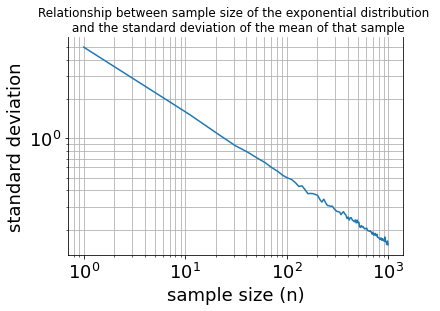

In [24]:
sample_size = list(range(1, 1001, 10))
stdev = []
"""
random.exponential(scale=1.0, size=None)
"""
scale = 0.2
for n in sample_size:
    means = [np.mean(np.random.exponential(1./scale,size=n)) for _ in range(1000)]
    stdev.append(st.stdev(means))
plt.plot(sample_size,stdev)
ax=plt.gca()
ax.spines['top'].set_color('none')
#両対数グラフ
ax.set_yscale('log')
ax.set_xscale('log')
plt.title('Relationship between sample size of the exponential distribution \n and the standard deviation of the mean of that sample', fontsize = 12)
plt.xlabel('sample size (n)',fontsize=18)
plt.ylabel('standard deviation',fontsize=18)
plt.grid(which='both')
plt.show()

これらのグラフの傾きは-0.5程度であることから，平均値の標準偏差は√nに反比例することが分かった．

# 5.二項分布の正規分布による近似

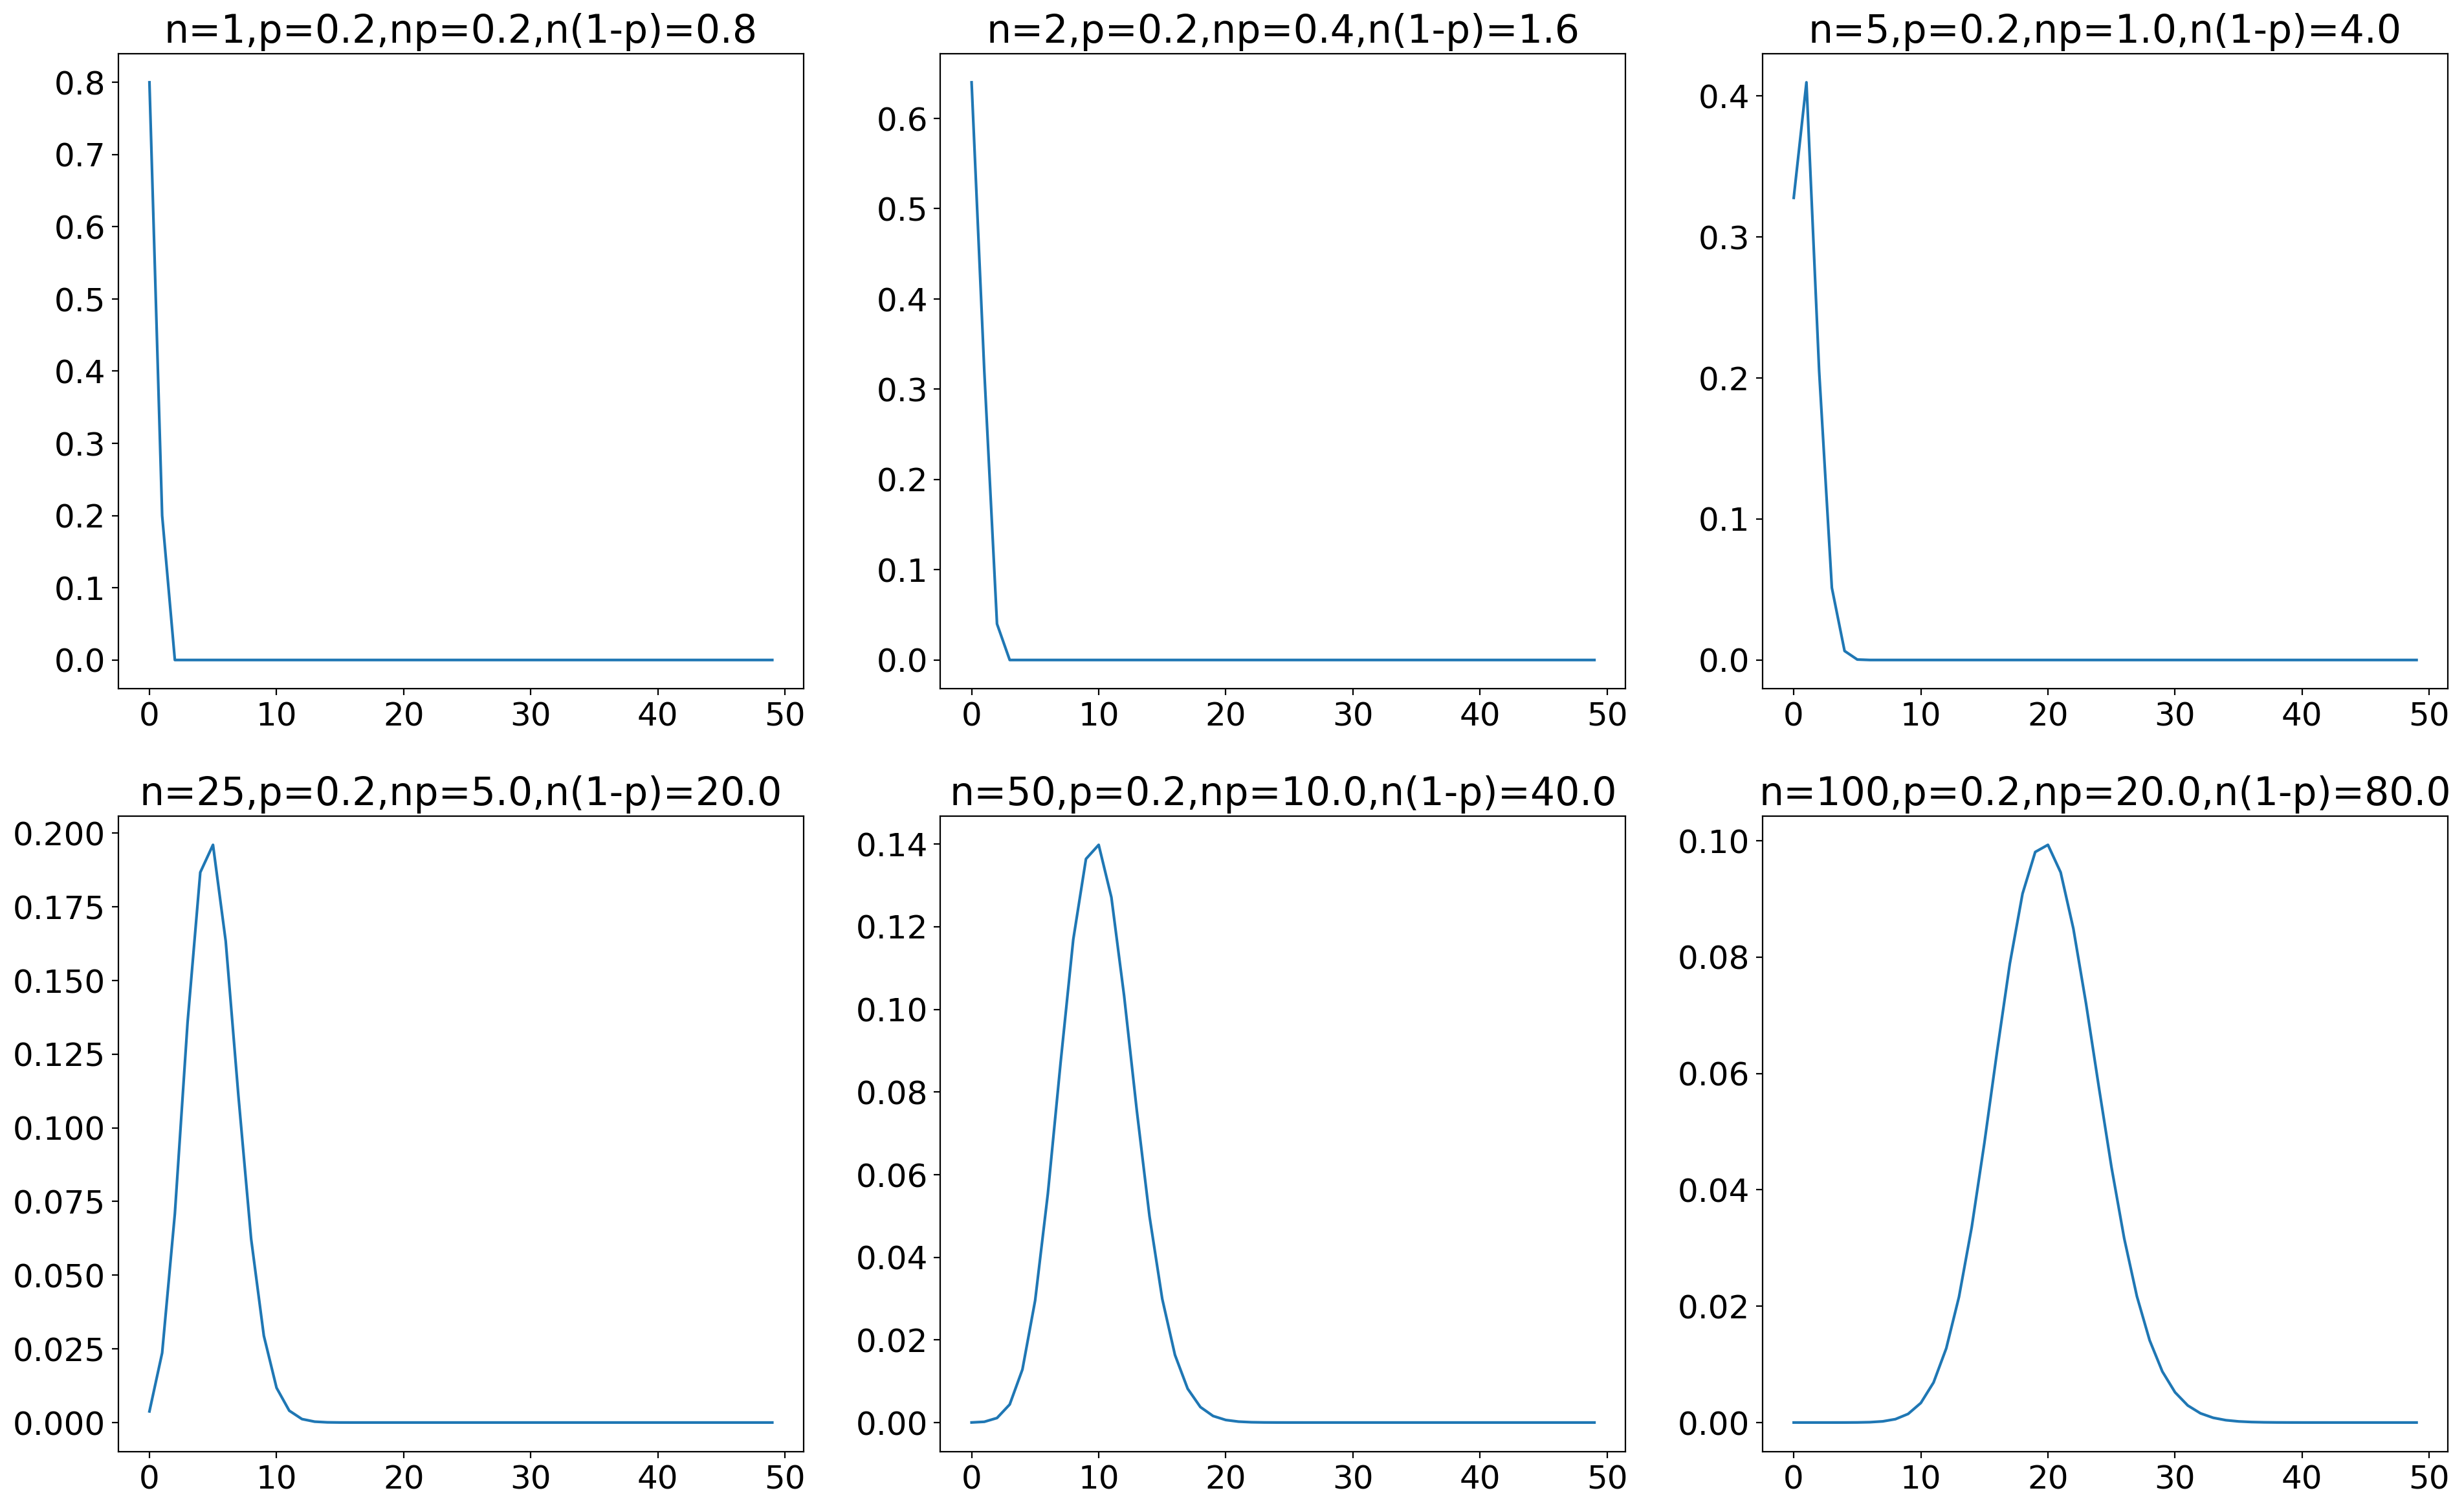

In [25]:
fig=plt.figure(figsize = (20, 12), dpi = 200)

list_n =[1, 2, 5, 25, 50, 100] 
p = 0.2
x=list(range(50))
for i, n in enumerate(list_n):
    ax = fig.add_subplot(2, 3, i+1)
    plt.title(f'n={n},p={p},np={n*p},n(1-p)={n*(1-p)}')
    rv = stats.binom(n,p)
    y = rv.pmf(x)
    plt.plot(x,y)
plt.subplots_adjust(left = 0.05, right=0.95, bottom = 0.05, top = 0.95)
plt.show()

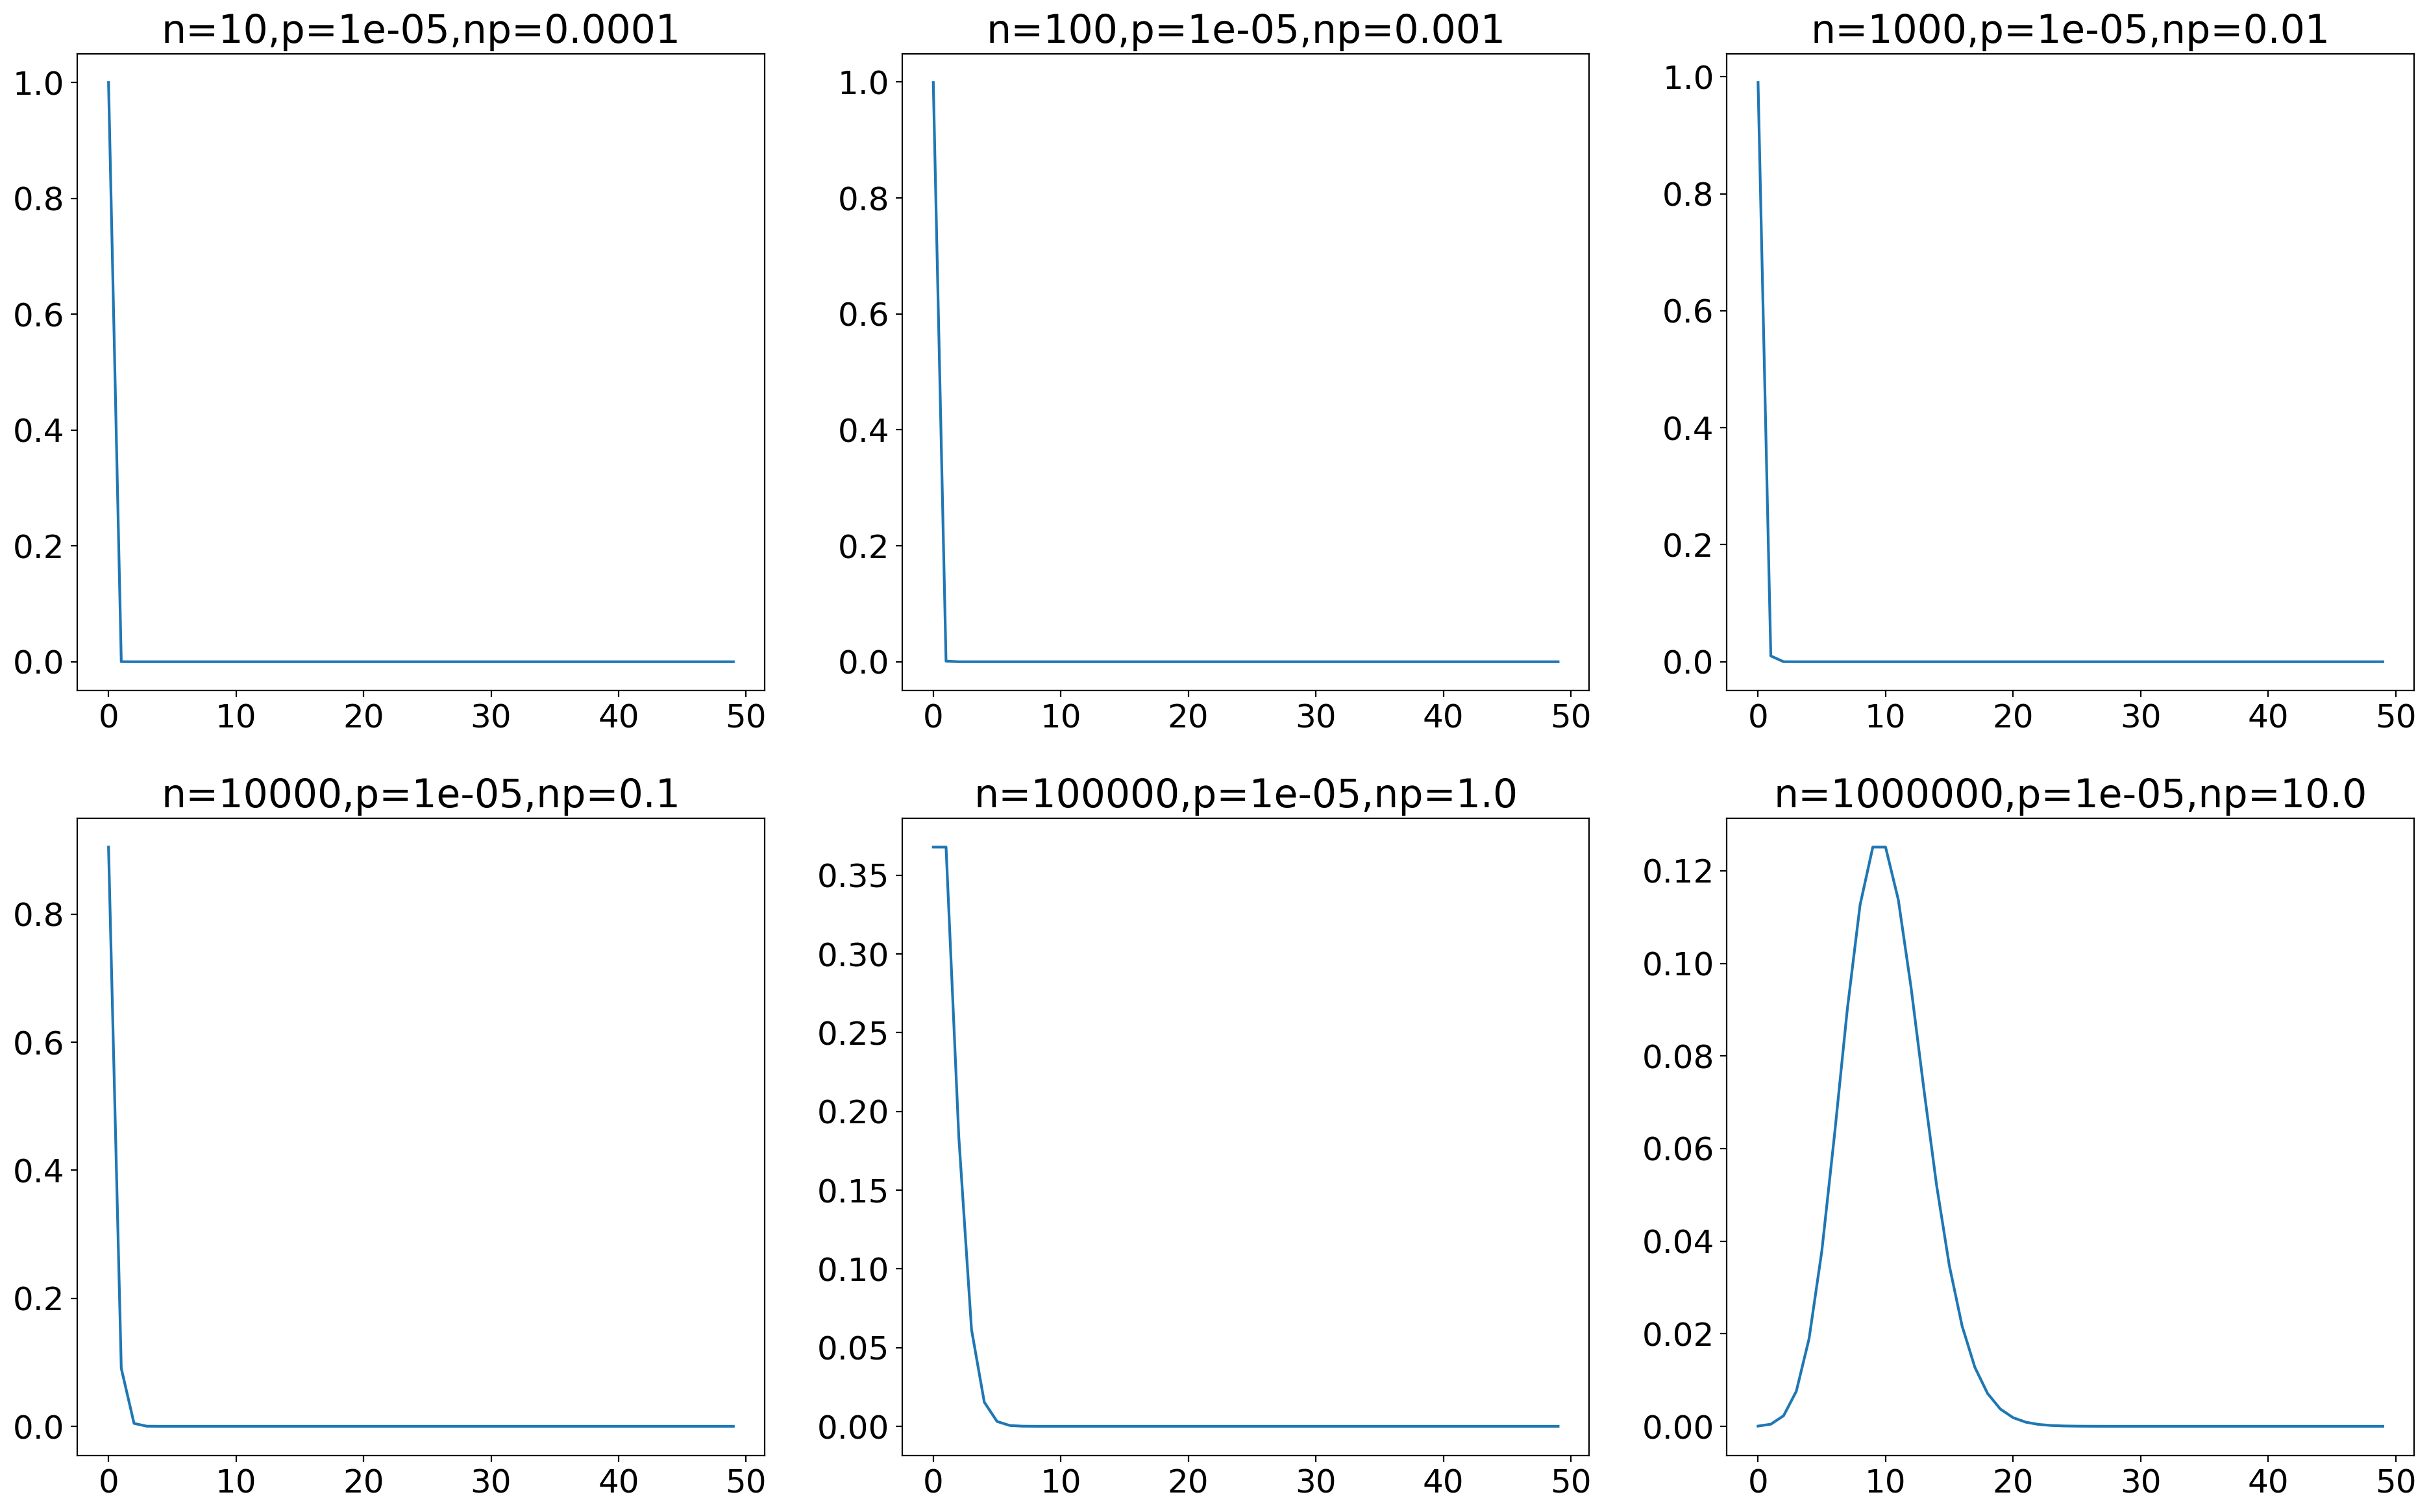

In [26]:
fig=plt.figure(figsize = (20, 12), dpi = 200)

list_n =[10, 100, 1000, 10000, 100000,1000000] 
p = 0.00001
x=list(range(50))
for i, n in enumerate(list_n):
    ax = fig.add_subplot(2, 3, i+1)
    plt.title(f'n={n},p={p},np={n*p}')
    rv = stats.binom(n,p)
    y = rv.pmf(x)
    plt.plot(x,y)
plt.subplots_adjust(left = 0.05, right=0.95, bottom = 0.05, top = 0.95)
plt.show()

分布の形について，npの値が小さいときは，ポアソン分布のようであり，npの値が大きくなるにつれて，正規分布に近づいていくことが分かる．